# Spatio-temporal conditional autoregressive model for wildfire simulation

### Import libraries 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import split_data
from helper import get_dataset_from_generator
from model import STCAR
from load_dataset import get_dataset

### Train model

In [ ]:
dataset = get_dataset_from_generator()

model = STCAR()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
    )
model.fit(dataset, epochs=1, 
        batch_size=1
          )

29852/29852 ━━━━━━━━━━━━━━━━━━━━ 2933s 98ms/step - loss: 7.4956 - loss_Z1: 7.4033 - loss_Z2: 0.0923


### Show results

In [ ]:
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")

In [ ]:
dataset = get_dataset(
            f"../dataset/*{"train"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))

for i in range(10):
    predictions = model(X[i,:,:,:], training=False)
    plt.imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none')
    plt.colorbar(label='Z2')
    y_locs = np.where(Y[i, :, :] == 1)
    plt.scatter(y_locs[1], y_locs[0], color='red', marker='o', label='Fire now', s=10)
    x_locs = np.where(X[i, :,:,11] == 1)
    plt.scatter(x_locs[1], x_locs[0], color='white', marker='x', label='Fire previous', s=50)
    plt.legend(loc='upper right')
    plt.show()

## Below examples of model run results are included using the Next Day Wildfire Dataset

In [ ]:
# WITH BIAS 2990s 100ms/step - loss: 8.8014 - loss_Z1: 8.7638 - loss_Z2: 0.0376
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")

rho: 0.12312482297420502
r: 0.12316547334194183
kernel: [[-8.2270727e-02]
 [-4.3374091e-01]
 [-2.7769120e+00]
 [-7.6402557e-01]
 [-8.4783763e-01]
 [-2.2402909e+00]
 [-2.8295094e+01]
 [ 4.8509645e+00]
 [ 6.3159533e-02]
 [-1.8547991e+01]
 [ 3.5281935e+00]
 [ 7.6218536e+01]]


In [ ]:
#WITHOUT BIAS
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")

rho: 0.10311978310346603
r: 0.10312171280384064
kernel: [[-9.8488353e-02]
 [ 1.0039104e-01]
 [-2.3626962e+00]
 [-1.0698392e+00]
 [-2.4170490e-01]
 [-1.7116499e+00]
 [-2.8940840e+01]
 [ 3.4446316e+00]
 [ 6.2320707e-04]
 [-1.9027872e+01]
 [ 4.3283515e+00]
 [ 7.0788925e+01]]


In [14]:
#With BIAS and batchsize = 1. 2933s 98ms/step - loss: 7.4956 - loss_Z1: 7.4033 - loss_Z2: 0.0923
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")

rho: 0.10600805282592773
r: 0.10598774999380112
kernel: [[-4.3688916e-02]
 [-3.4047061e-01]
 [-2.7223637e+00]
 [-5.8420217e-01]
 [-8.8387173e-01]
 [-1.1080034e+00]
 [-2.7341393e+01]
 [ 3.4131701e+00]
 [ 4.7592819e-02]
 [-1.7009876e+01]
 [ 3.6008914e+00]
 [ 6.4667290e+01]]


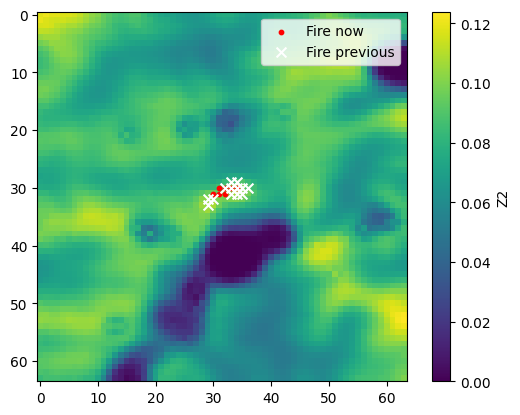

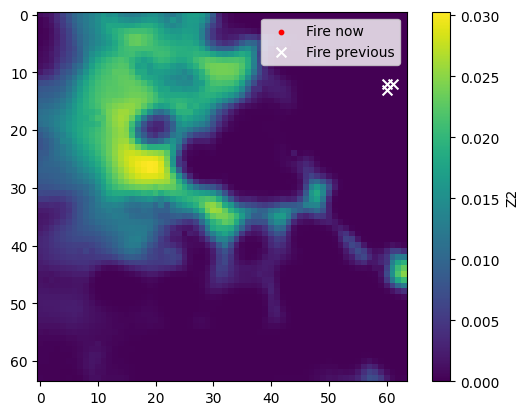

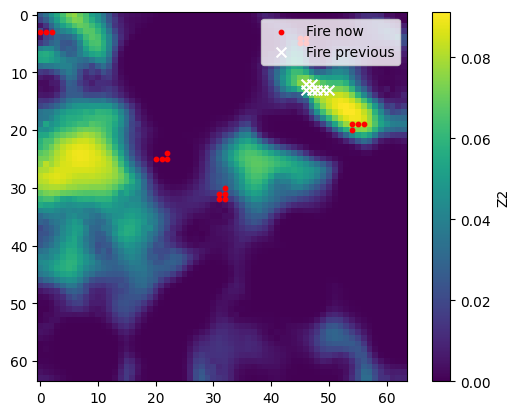

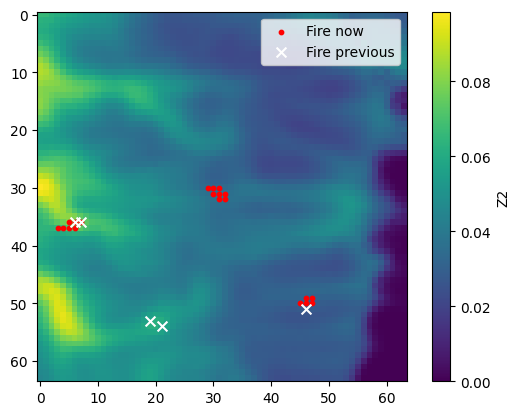

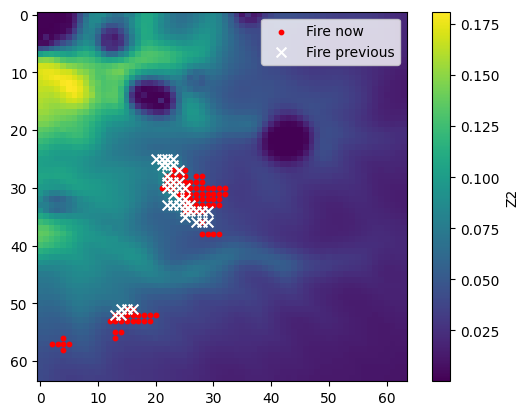

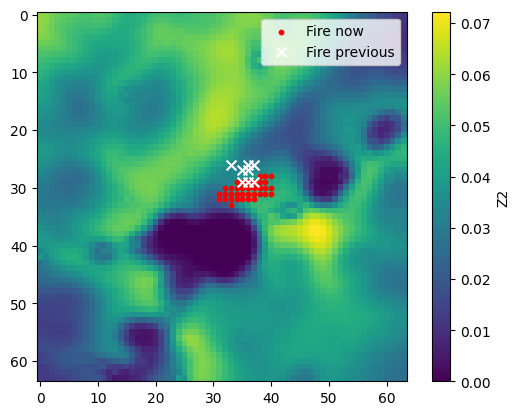

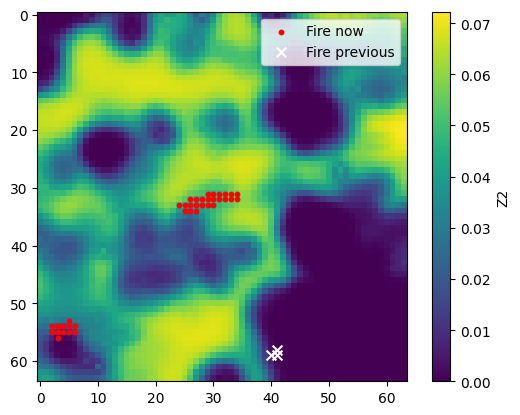

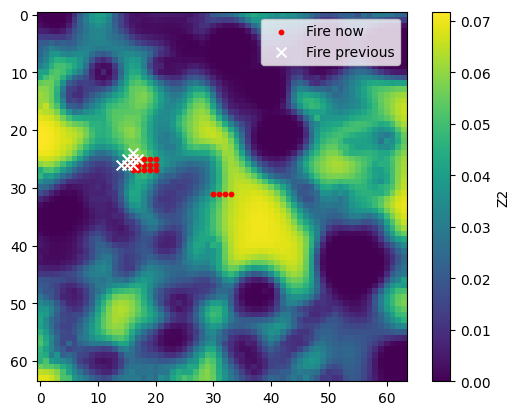

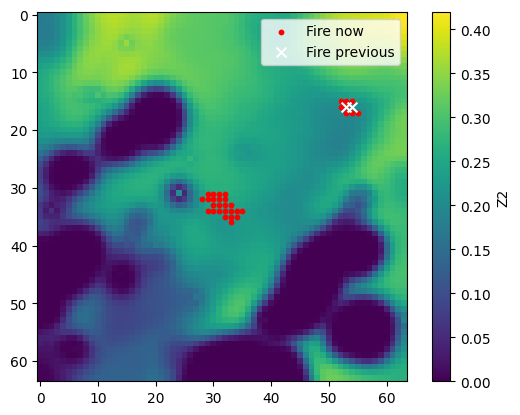

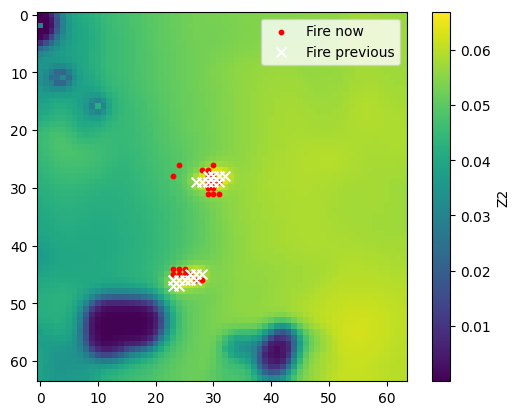

In [9]:
dataset = get_dataset(
            f"../dataset/*{"train"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))

for i in range(10):
    predictions = model(X[i,:,:,:], training=False)
    plt.imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none')
    plt.colorbar(label='Z2')
    y_locs = np.where(Y[i, :, :] == 1)
    plt.scatter(y_locs[1], y_locs[0], color='red', marker='o', label='Fire now', s=10)
    x_locs = np.where(X[i, :,:,11] == 1)
    plt.scatter(x_locs[1], x_locs[0], color='white', marker='x', label='Fire previous', s=50)
    plt.legend(loc='upper right')
    plt.show()

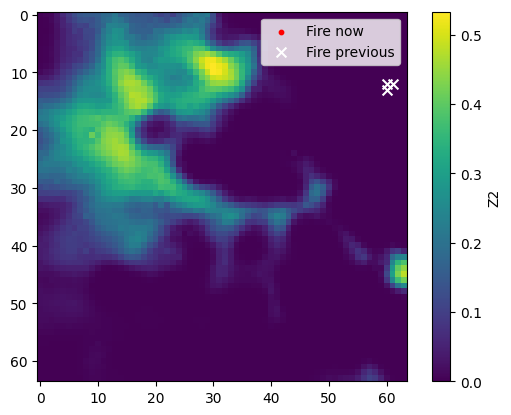

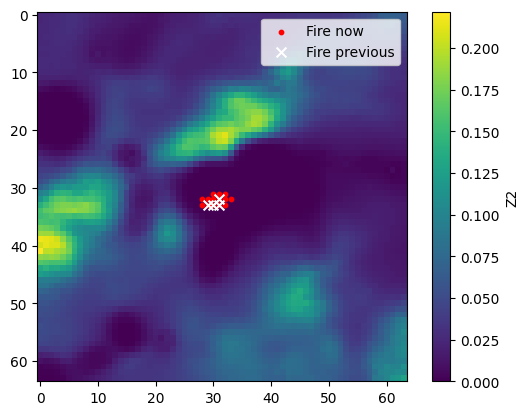

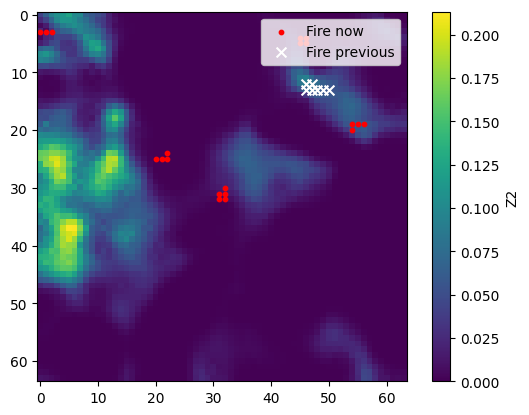

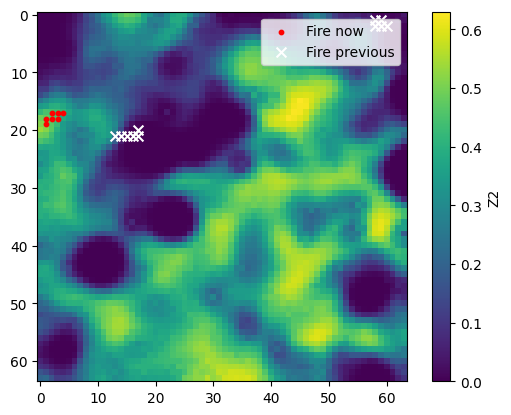

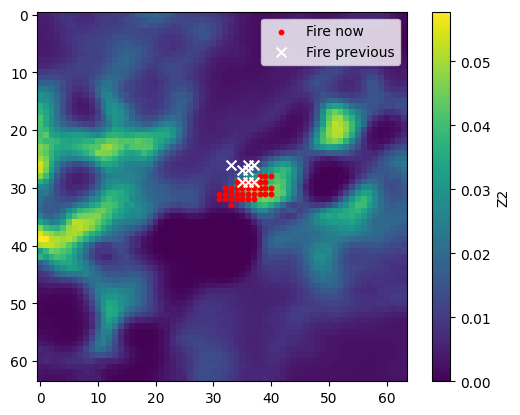

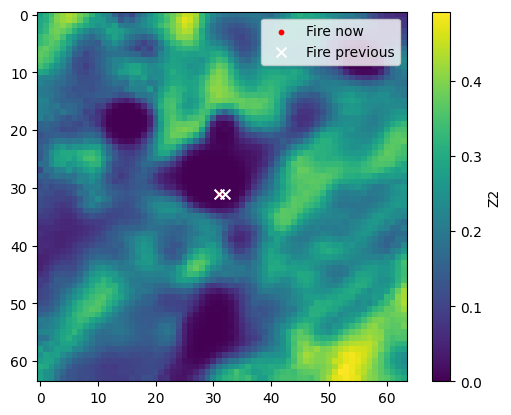

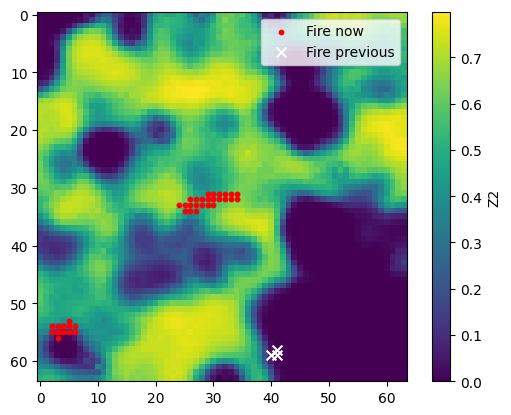

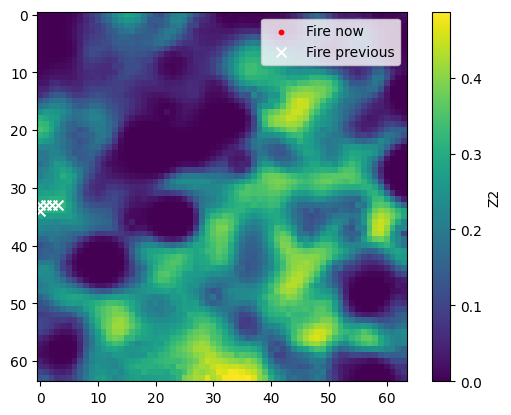

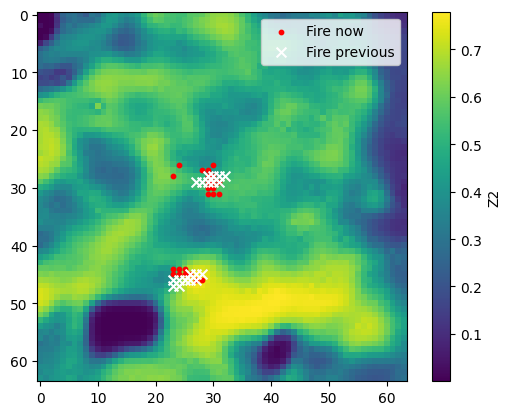

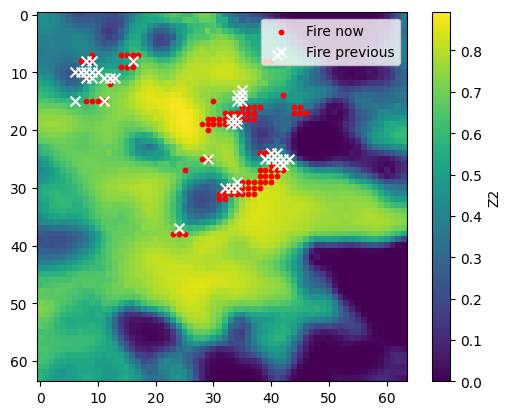

In [12]:
dataset = get_dataset(
            f"../dataset/*{"train"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))

for i in range(10):
    predictions = model(X[i,:,:,:], training=False)
    plt.imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none')
    plt.colorbar(label='Z2')
    y_locs = np.where(Y[i, :, :] == 1)
    plt.scatter(y_locs[1], y_locs[0], color='red', marker='o', label='Fire now', s=10)
    x_locs = np.where(X[i, :,:,11] == 1)
    plt.scatter(x_locs[1], x_locs[0], color='white', marker='x', label='Fire previous', s=50)
    plt.legend(loc='upper right')
    plt.show()

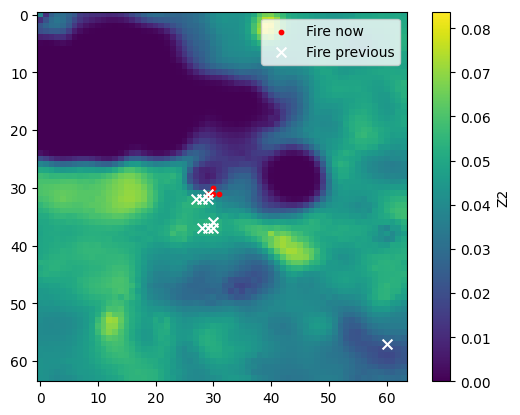

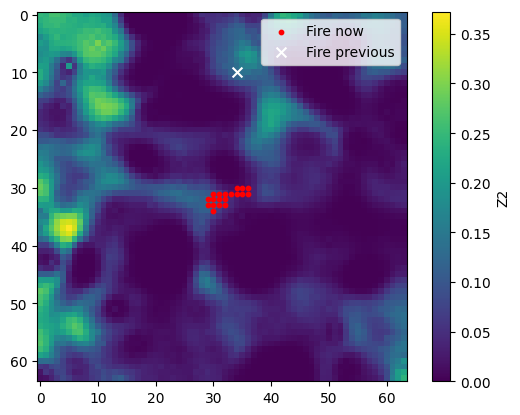

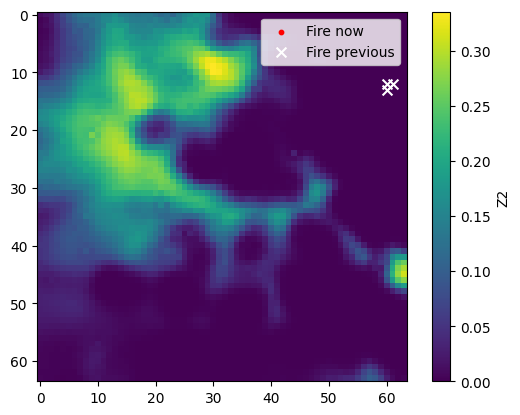

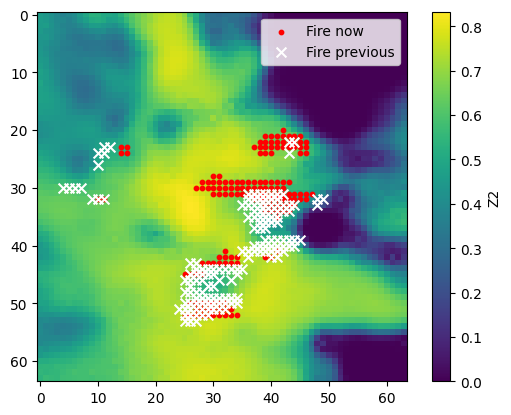

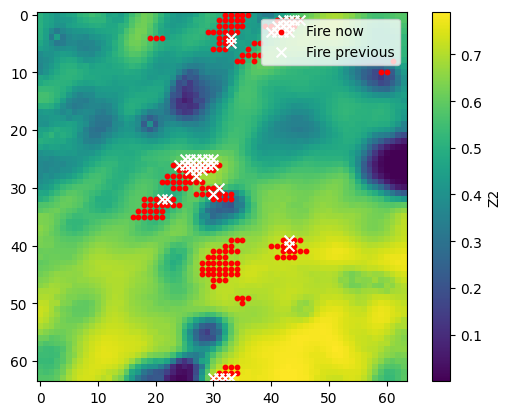

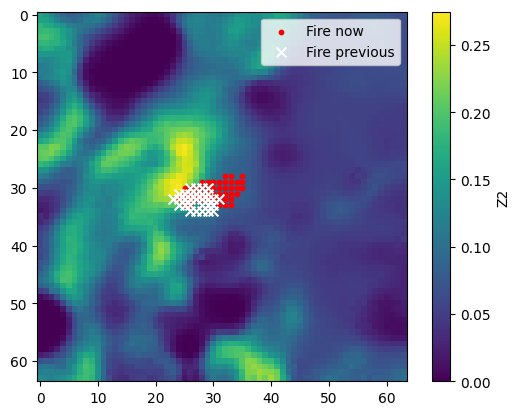

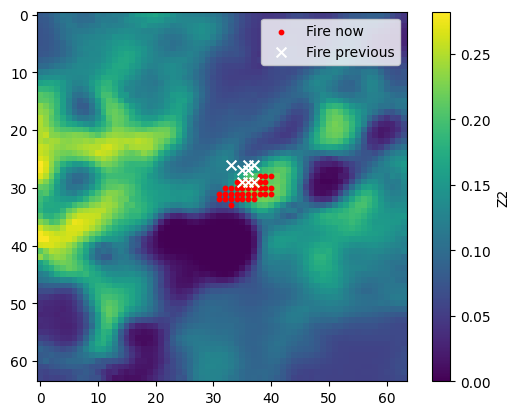

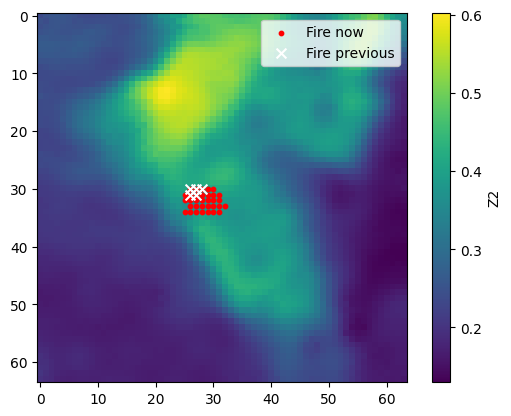

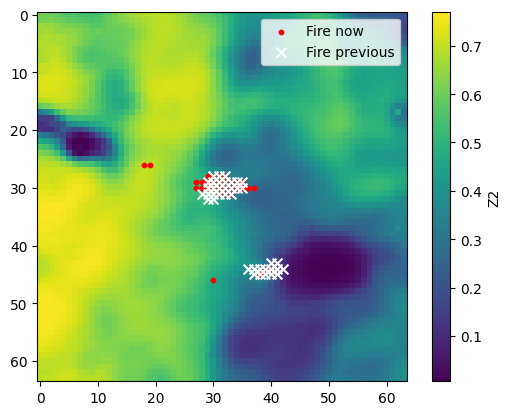

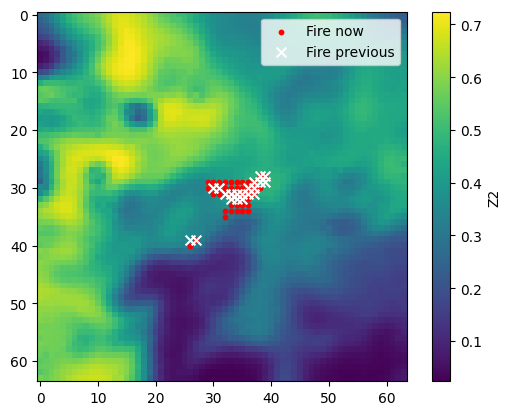

In [ ]:
dataset = get_dataset(
            f"../dataset/*{"train"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))


for i in range(10):
    predictions = model(X[i,:,:,:], training=False)
    plt.imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none')
    plt.colorbar(label='Z2', )
    y_locs = np.where(Y[i, :, :] == 1)
    plt.scatter(y_locs[1], y_locs[0], color='red', marker='o', label='Fire now', s=10)
    x_locs = np.where(X[i, :,:,11] == 1)
    plt.scatter(x_locs[1], x_locs[0], color='white', marker='x', label='Fire previous', s=50)
    plt.legend(loc='upper right')

    plt.title(f"Prediction for sample {i}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

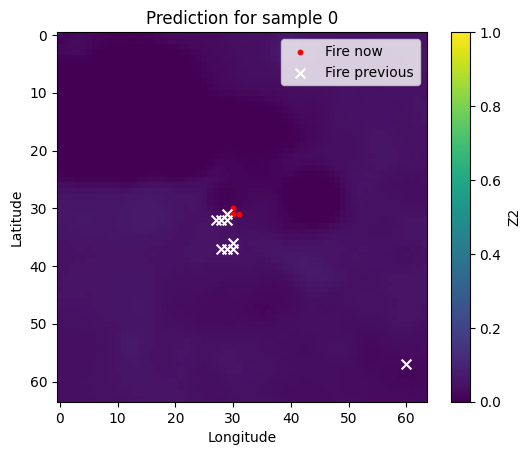

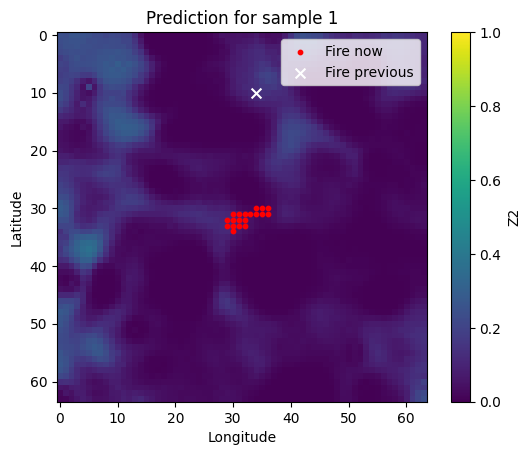

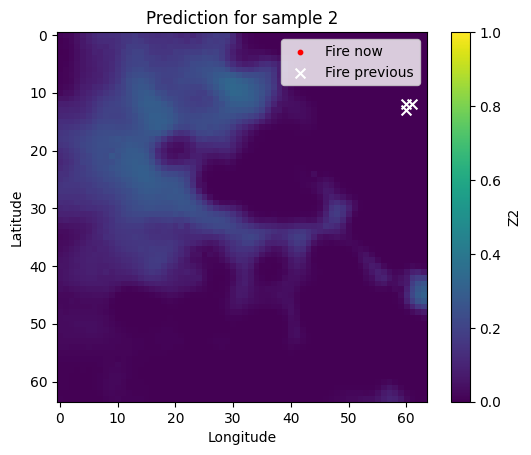

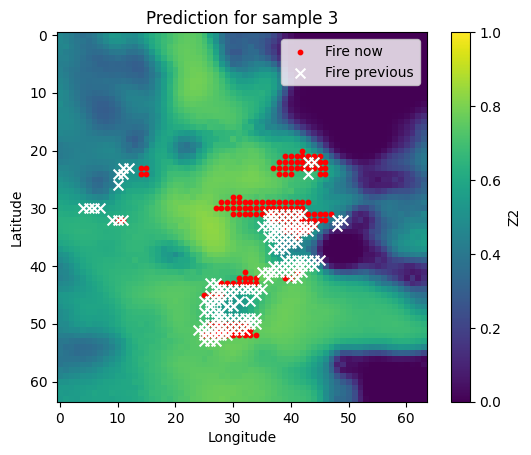

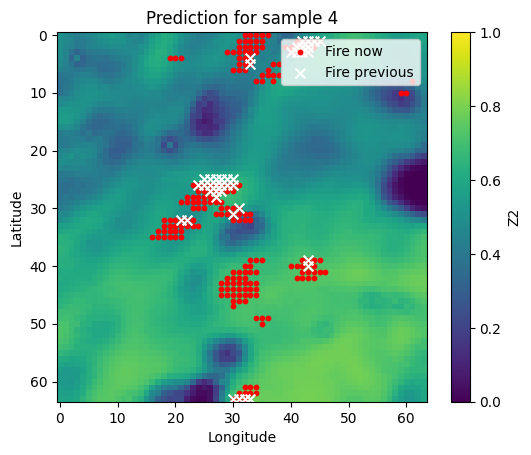

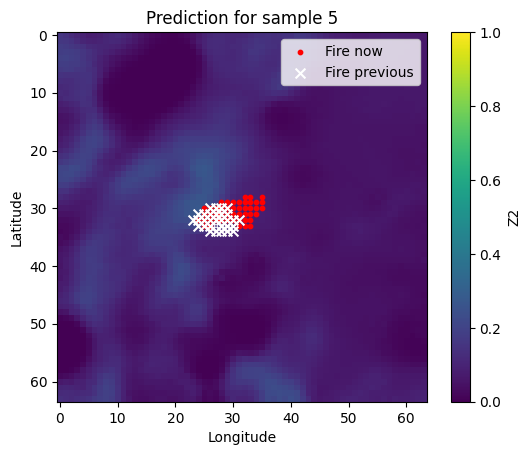

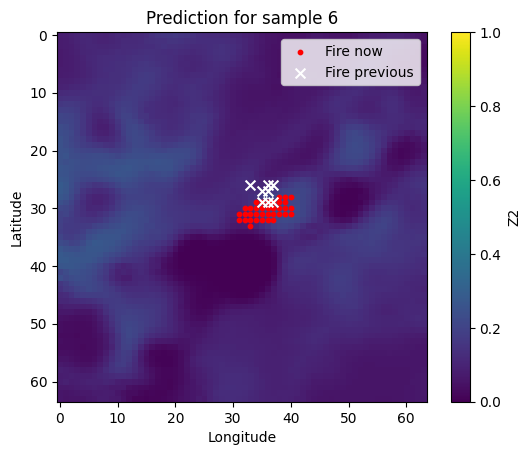

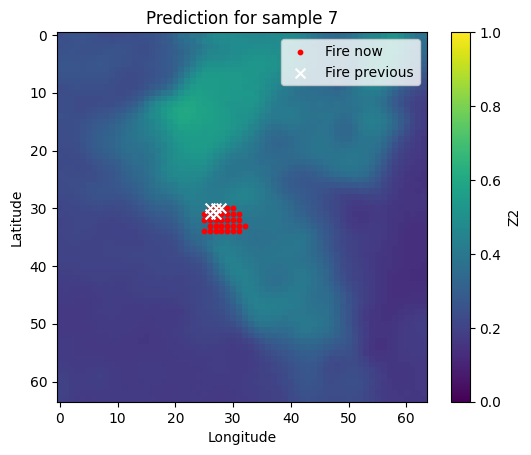

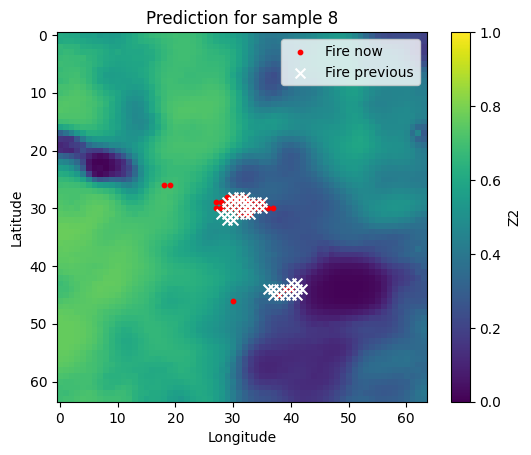

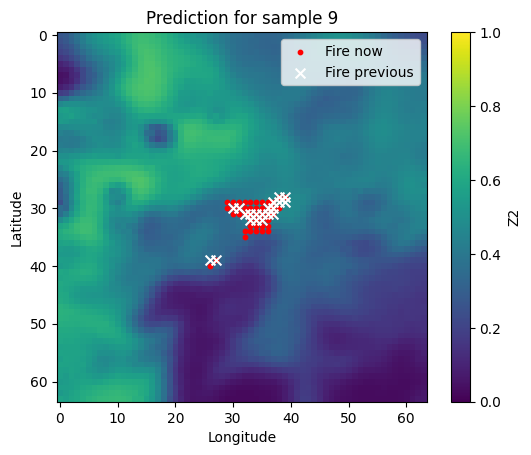

In [ ]:

for i in range(10):
    predictions = model(X[i,:,:,:], training=False)

    im = plt.imshow(tf.reshape(predictions['Z2'], (64, 64)), 
                    cmap='viridis', 
                    interpolation='none',
                    vmin=0, vmax=1)  
    
    plt.colorbar(im, label='Z2')  
    
    y_locs = np.where(Y[i, :, :] == 1)
    plt.scatter(y_locs[1], y_locs[0], color='red', marker='o', label='Fire now', s=10)
    x_locs = np.where(X[i, :,:,11] == 1)
    plt.scatter(x_locs[1], x_locs[0], color='white', marker='x', label='Fire previous', s=50)
    plt.legend(loc='upper right')

    plt.title(f"Prediction for sample {i}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

In [1]:
# get the AUC for the predictions on the test set
from helper import initialise_STCAR_with_previous_weights
import numpy as np
model = initialise_STCAR_with_previous_weights(
    rho = 0.12312482297420502,
    r = 0.12316547334194183,
    kernel = np.array([[-8.2270727e-02],
                            [-4.3374091e-01],
                            [-2.7769120e+00],
                            [-7.6402557e-01],
                            [-8.4783763e-01],
                            [-2.2402909e+00],
                            [-2.8295094e+01],
                            [ 4.8509645e+00],
                            [ 6.3159533e-02],
                            [-1.8547991e+01],
                            [ 3.5281935e+00],
                            [ 7.6218536e+01]])
)

test_dataset = get_dataset(
            f"../dataset/*{"test"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)

from sklearn.metrics import roc_auc_score
y_true = []
y_pred = []
for X_batch, Y_batch in test_dataset:
    predictions = model(X_batch, training=False)
    y_true.append(Y_batch.numpy().flatten())
    y_pred.append(predictions['Z2'].numpy().flatten())
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
auc = roc_auc_score(y_true, y_pred)
print(f"AUC: {auc:.4f}")

ValueError: not enough values to unpack (expected 2, got 1)

In [2]:
from model import STCAR_nn

dataset = get_dataset_from_generator()

model = STCAR_nn()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
    )
model.fit(dataset, epochs=1, 
        batch_size=1
          )

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
  27612/Unknown 3896s 141ms/step - loss: 0.3365 - loss_Z1: 0.2023 - loss_Z2: 0.1342

KeyboardInterrupt: 

In [3]:
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")

rho: 0.5820873379707336
r: 0.5823205709457397
kernel: [[ 1.07092895e-01 -1.41921386e-01  1.67330414e-01  2.81536162e-01
  -2.47708172e-01 -2.70056725e-01 -7.97817335e-02  1.10230178e-01
   1.40812218e-01  3.00364912e-01  2.14081483e-05  2.80686289e-01
  -9.22011137e-02 -1.87144876e-01  1.92146719e-01  2.16915518e-01
   2.47827262e-01 -2.02435493e-01 -1.64644923e-02  1.39812276e-01
  -1.60927564e-01 -2.05965638e-02  2.55165875e-01  1.19227812e-01
  -4.33733221e-03 -2.08688945e-01 -2.42011875e-01  2.28998631e-01
  -5.53585449e-03  3.34262520e-01  2.00737000e-01  4.88366373e-03
  -9.78793949e-03  1.92750990e-01 -1.10704392e-01  1.49098456e-01
   2.23328337e-01 -1.74723431e-01 -7.09225684e-02 -1.06388226e-01
   5.07560894e-02 -1.58209860e-01 -3.36428046e-01 -1.26611054e-01
  -4.03231382e-03 -2.89767087e-02  2.09762797e-01  1.24303205e-02
   5.32639362e-02  9.72544253e-02 -4.31898087e-02 -2.11457297e-01
  -5.13077080e-02  2.73090780e-01 -1.57855242e-01 -1.68491364e-01
   4.98466194e-02 -2.2

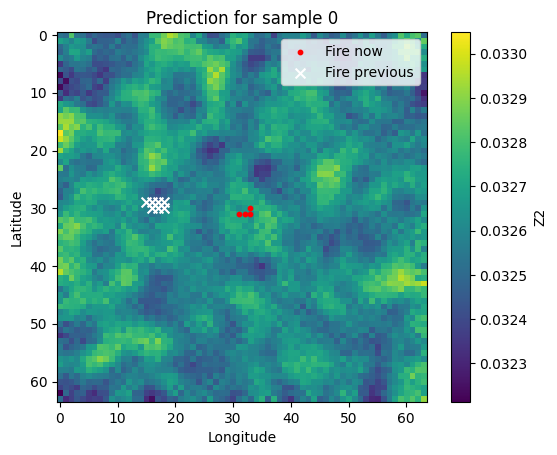

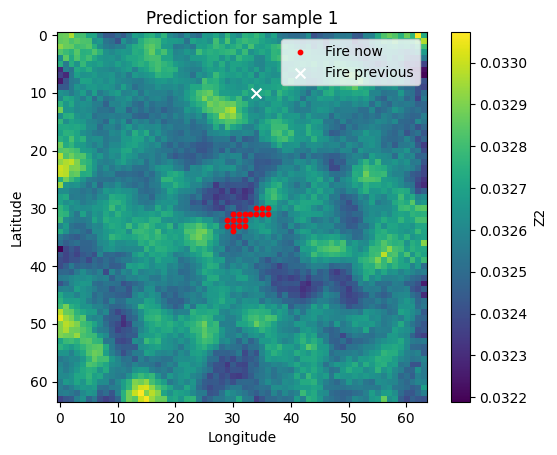

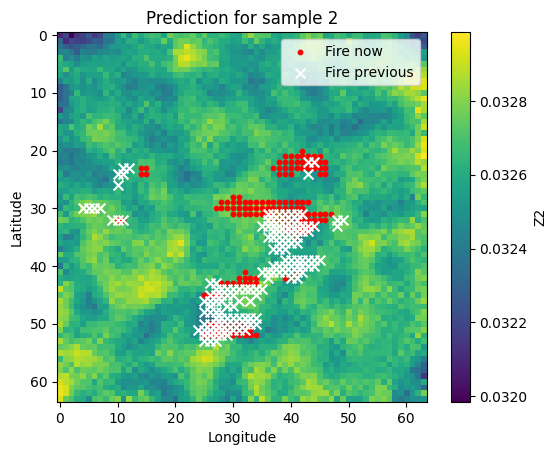

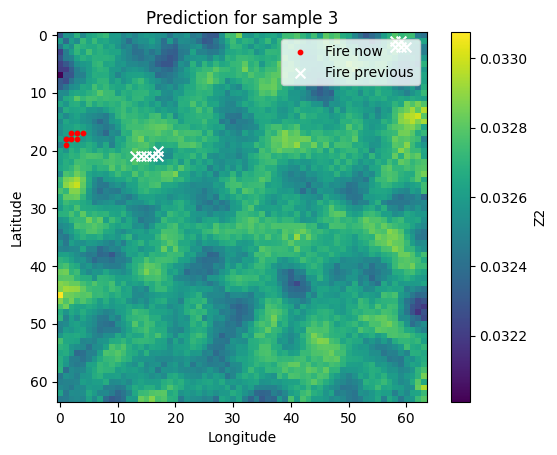

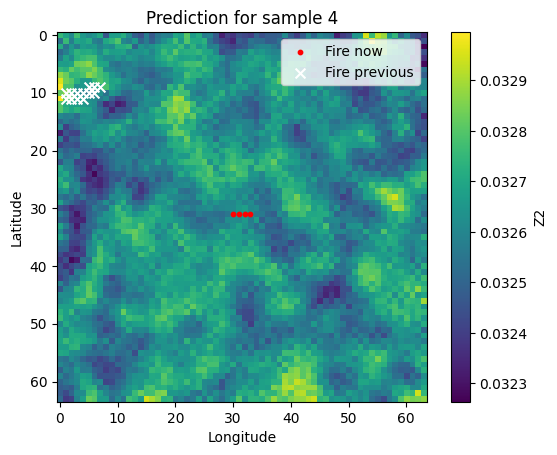

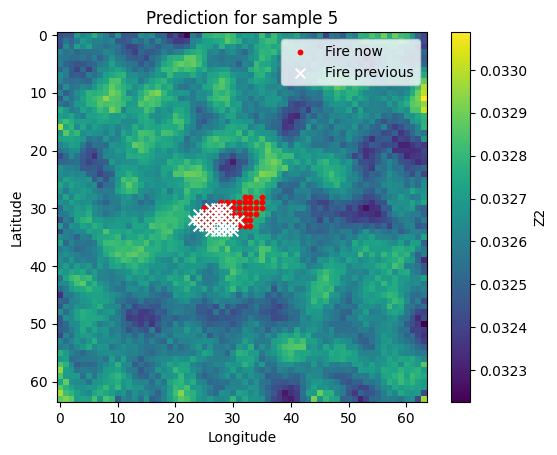

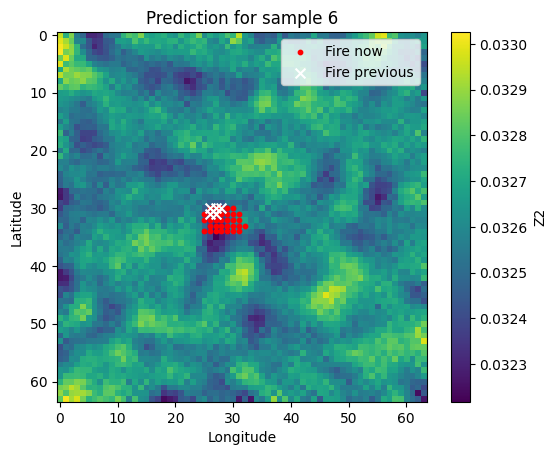

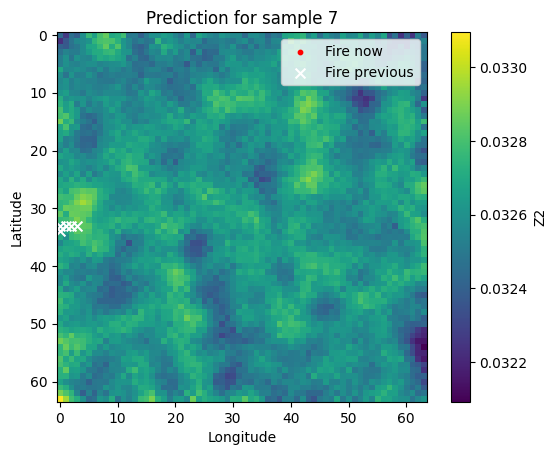

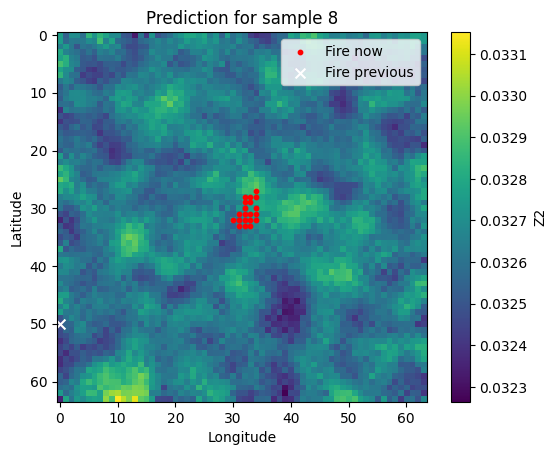

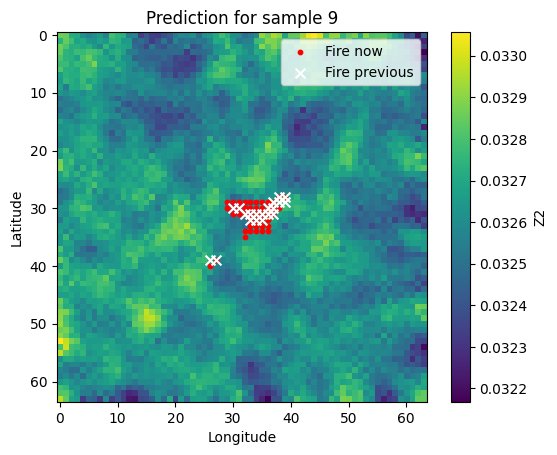

In [ ]:

dataset = get_dataset(
            f"../dataset/*{"train"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))


for i in range(10):
    predictions = model(X[i,:,:,:], training=False)
    plt.imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none')
    plt.colorbar(label='Z2', )
    y_locs = np.where(Y[i, :, :] == 1)
    plt.scatter(y_locs[1], y_locs[0], color='red', marker='o', label='Fire now', s=10)
    x_locs = np.where(X[i, :,:,11] == 1)
    plt.scatter(x_locs[1], x_locs[0], color='white', marker='x', label='Fire previous', s=50)
    plt.legend(loc='upper right')

    plt.title(f"Prediction for sample {i}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

In [2]:
from model import STCAR_nn

dataset = get_dataset_from_generator(buffer_size=20)

model = STCAR()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
    )
model.fit(dataset, epochs=1, 
        batch_size=1
          )

   4784/Unknown 12594s 3s/step - loss: 6.3660 - loss_Z1: 5.5596 - loss_Z2: 0.8064

KeyboardInterrupt: 

rho: 0.3286309540271759
r: 0.32861948013305664
kernel: [[ 1.6594080e-03]
 [-3.7233144e-02]
 [-1.2529315e+00]
 [-8.8640757e-02]
 [-2.8216809e-01]
 [-6.0099614e-01]
 [-4.1277194e+00]
 [-1.6880667e-01]
 [ 1.2794364e-02]
 [-5.6427944e-01]
 [ 6.8303198e-01]
 [ 2.0960806e+01]]
bias: [-18.065014]


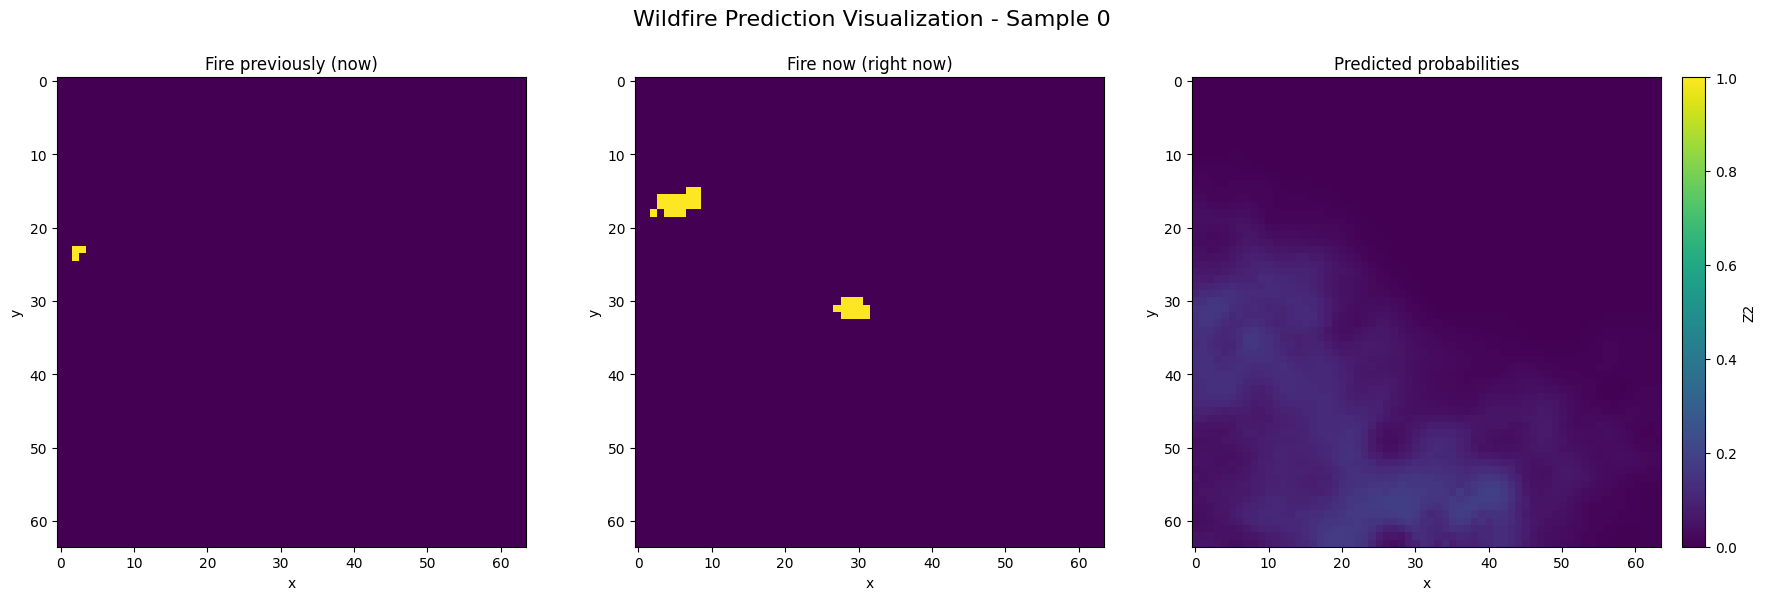

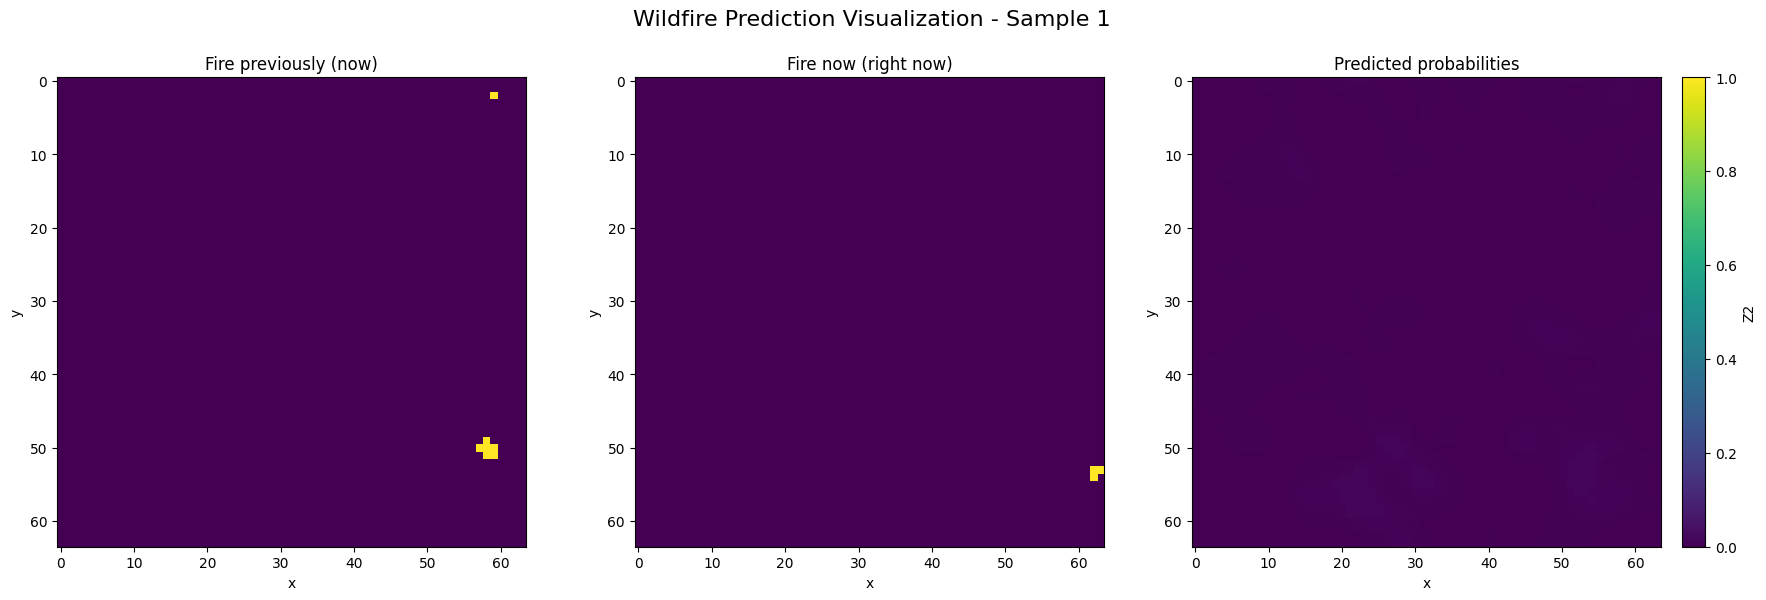

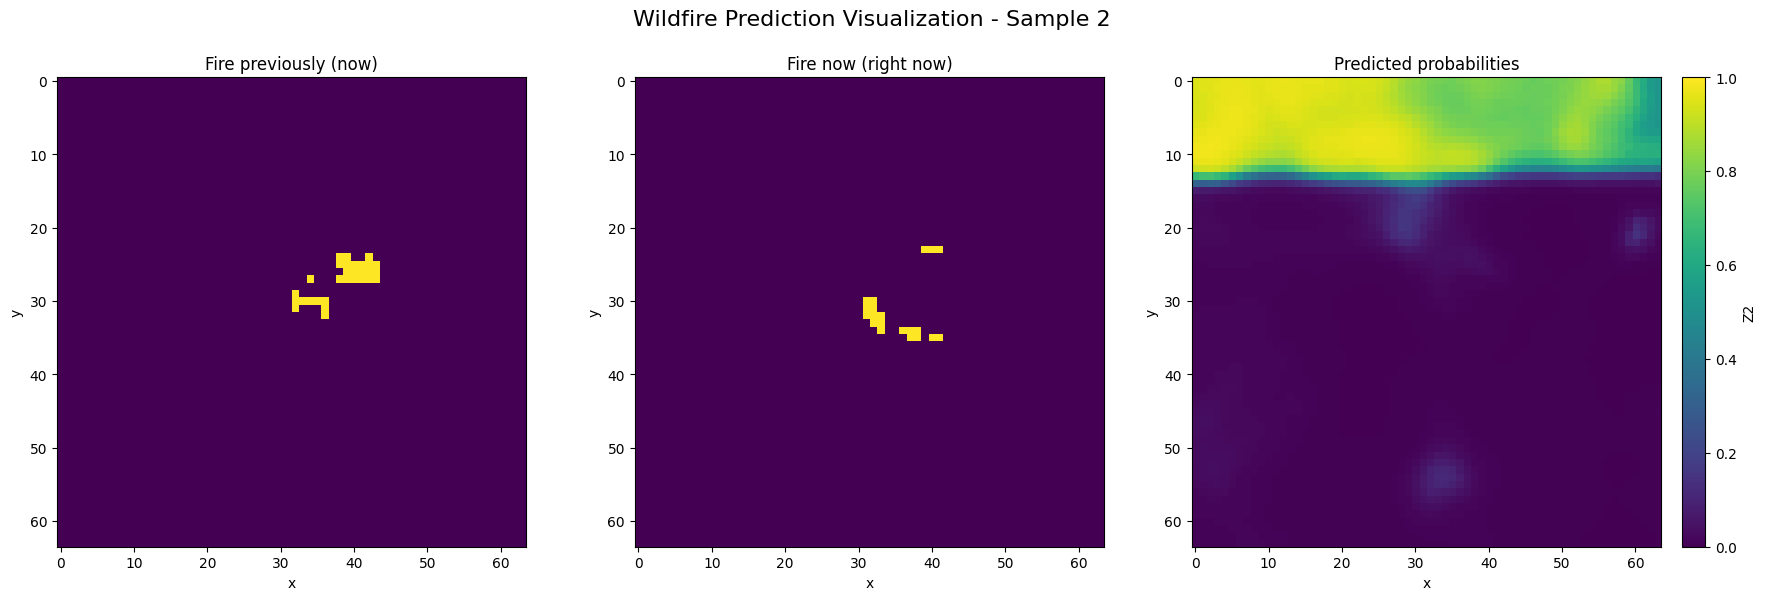

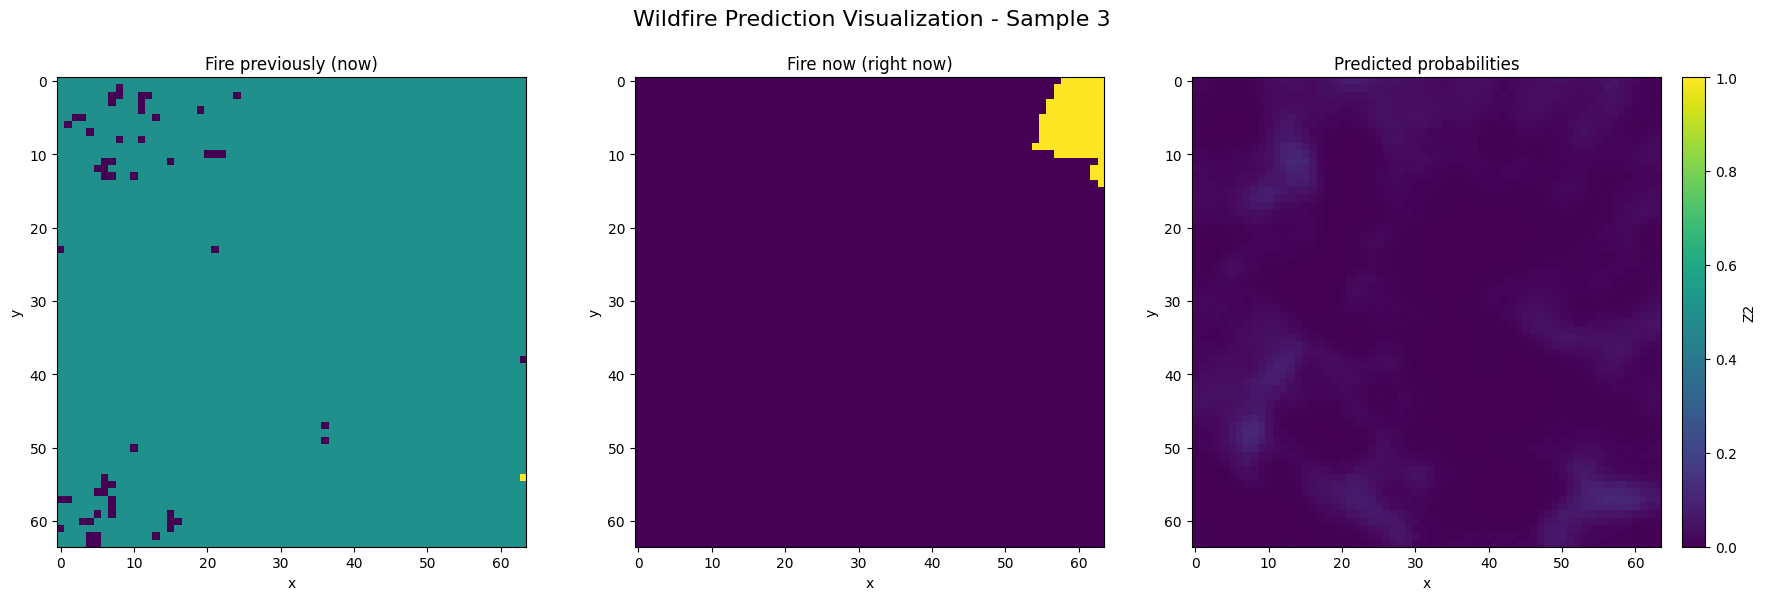

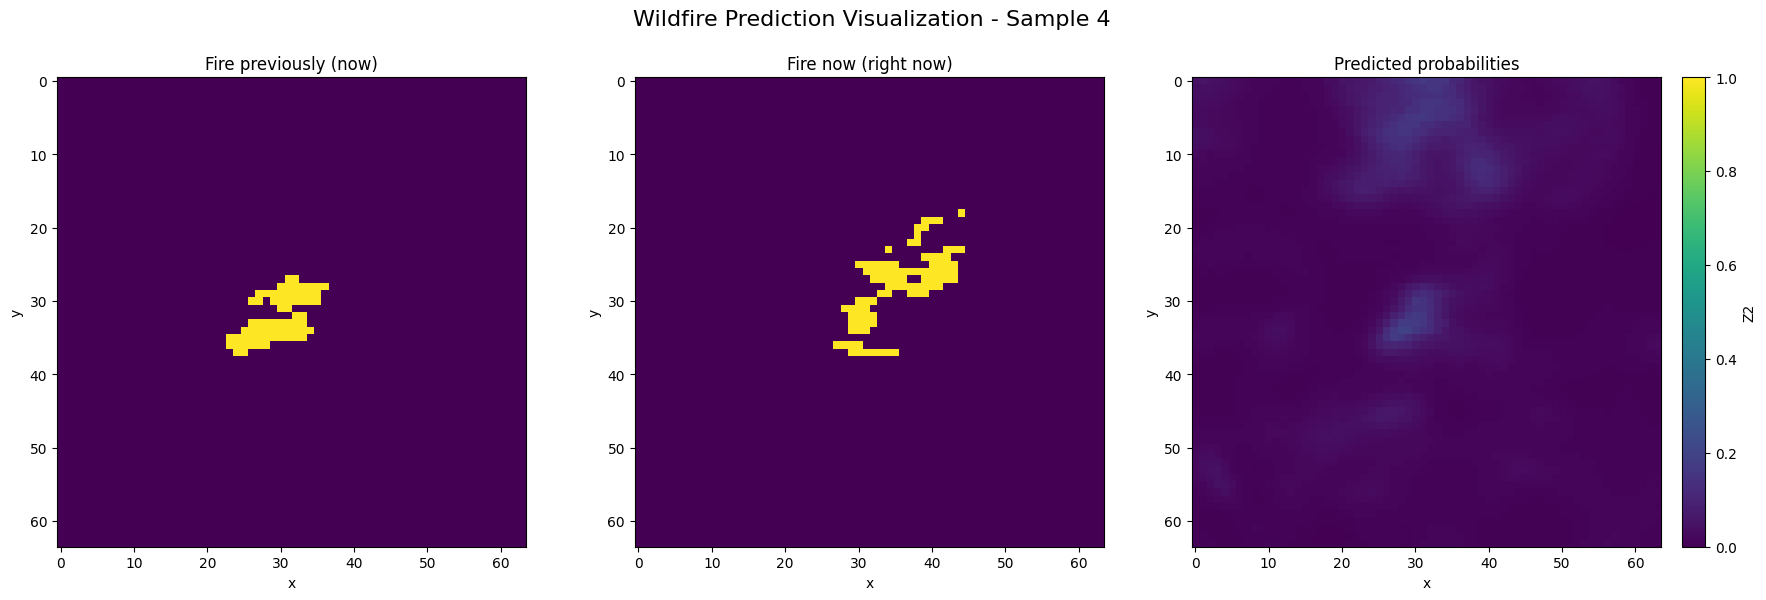

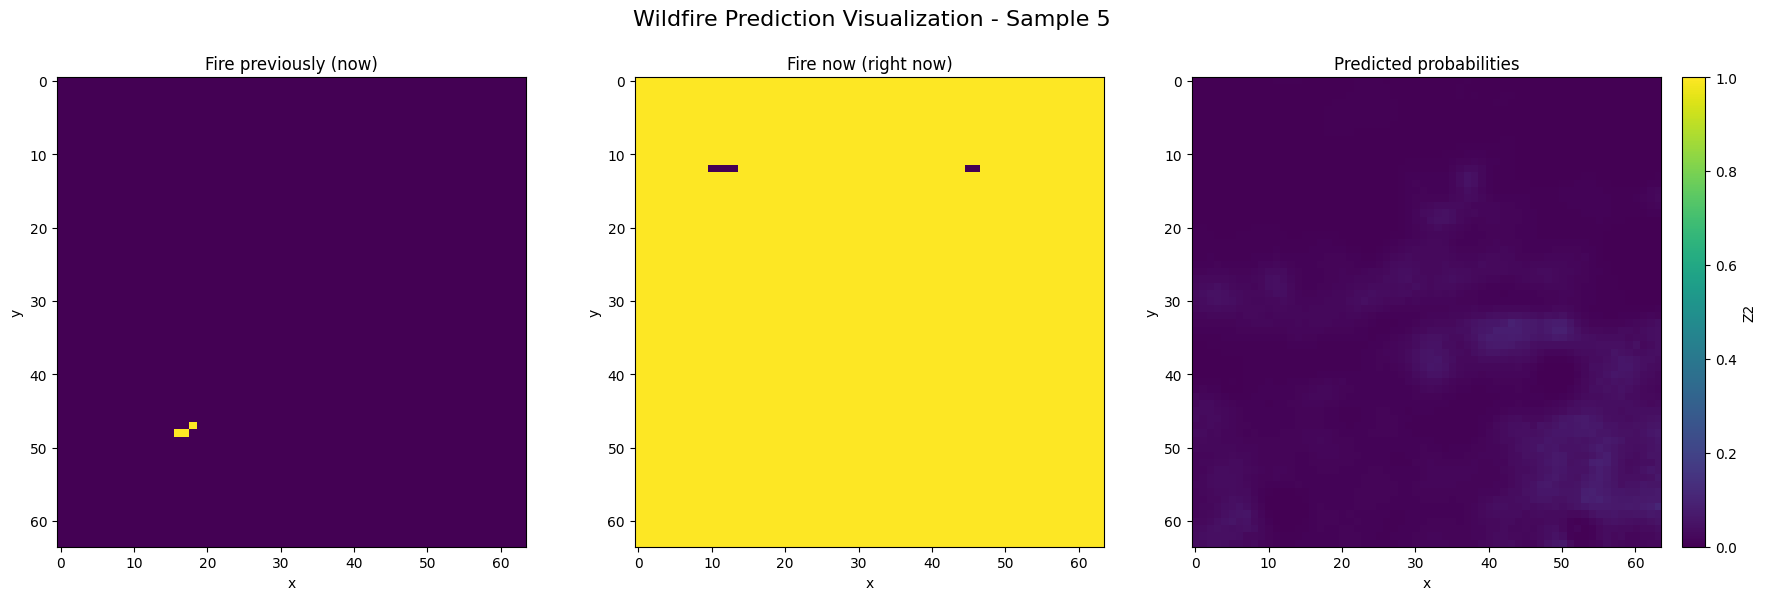

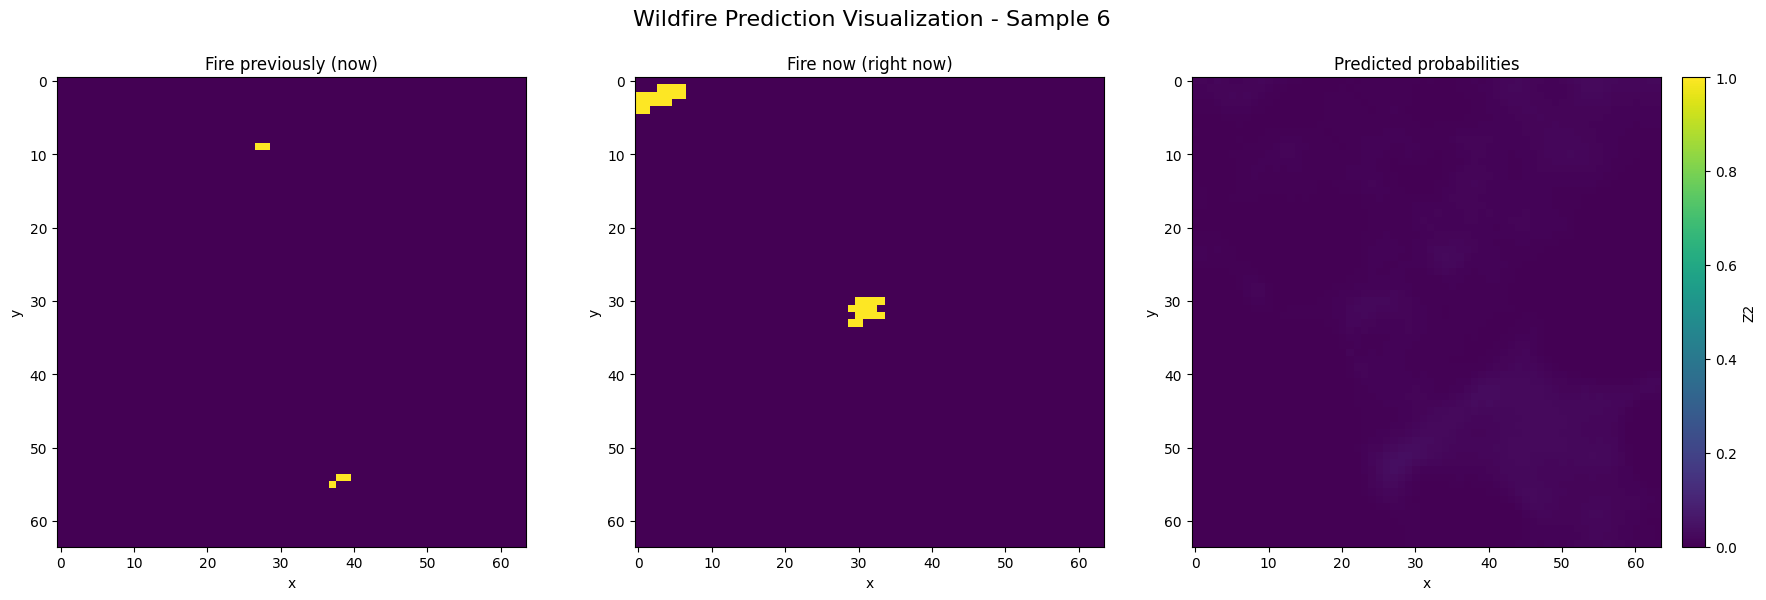

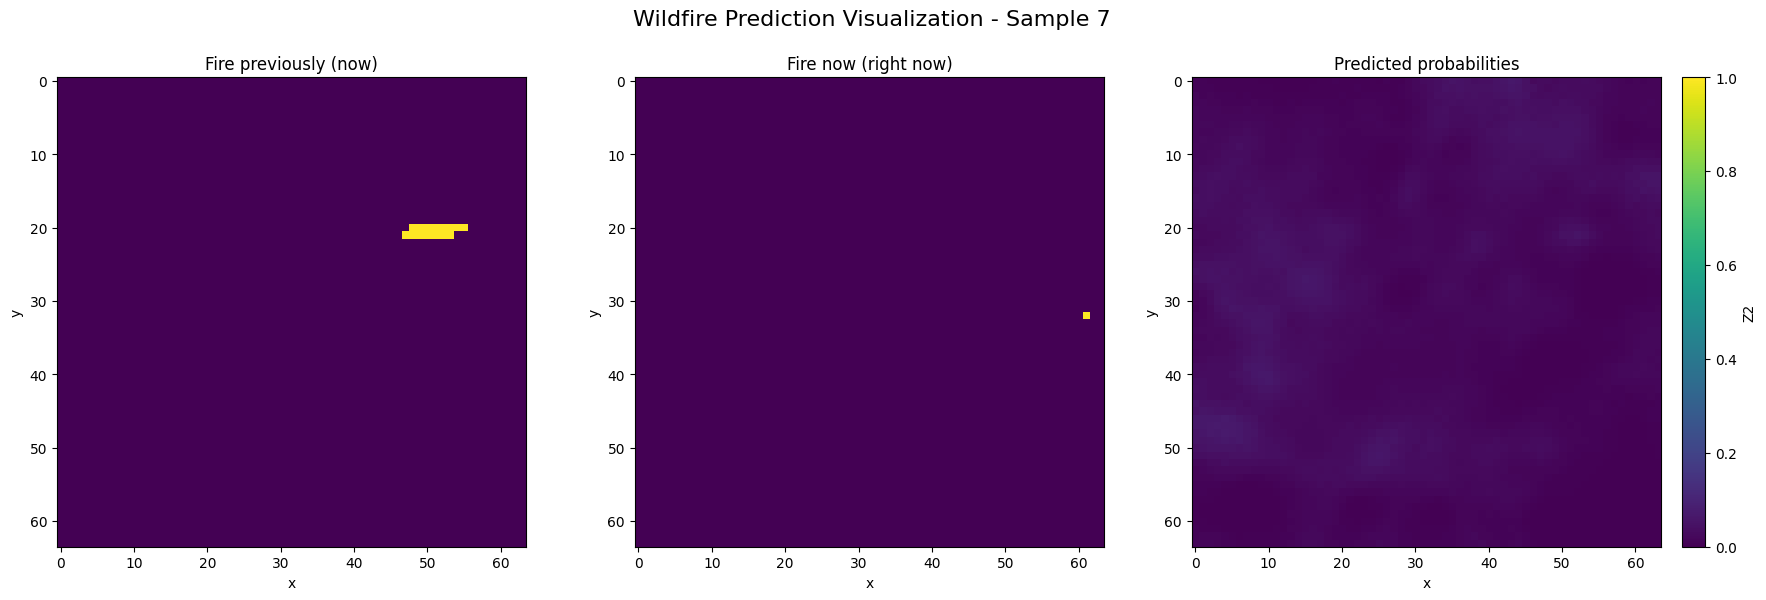

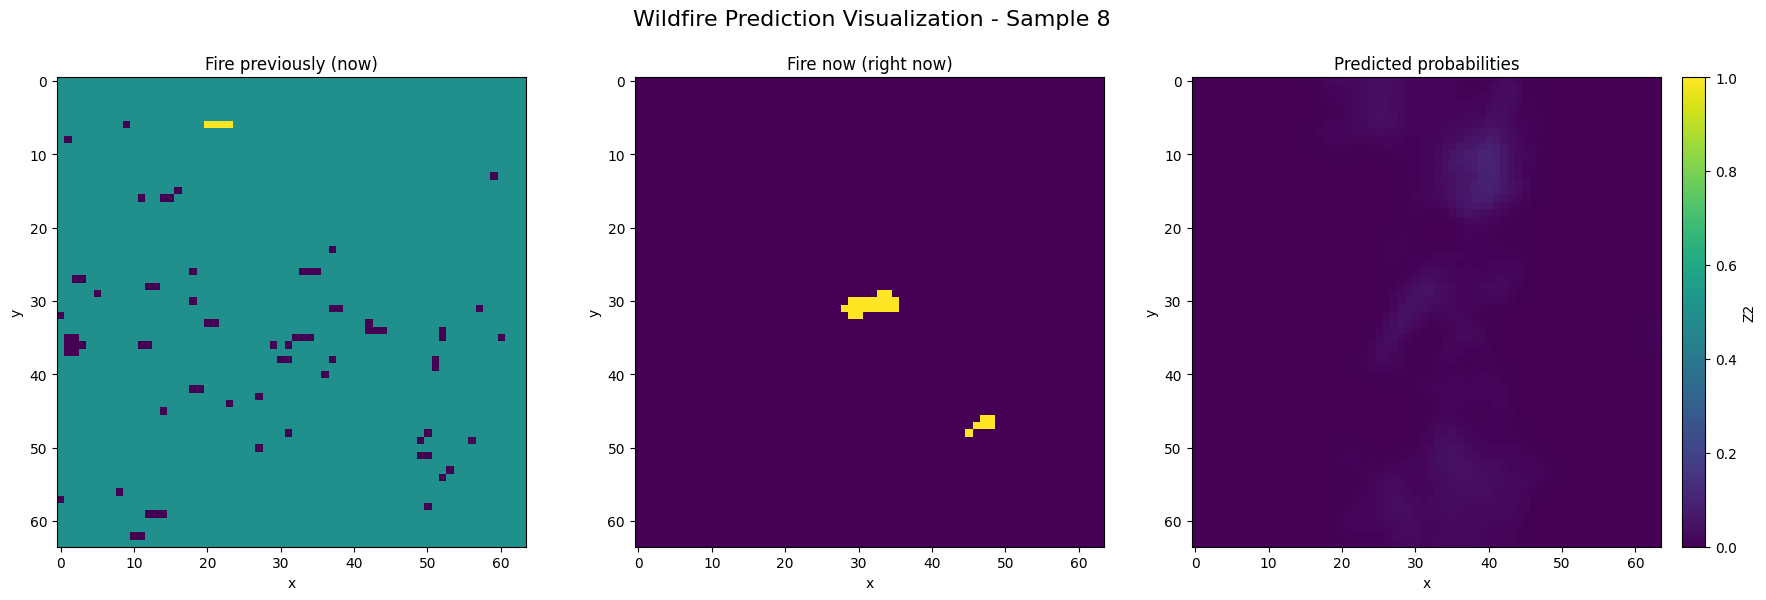

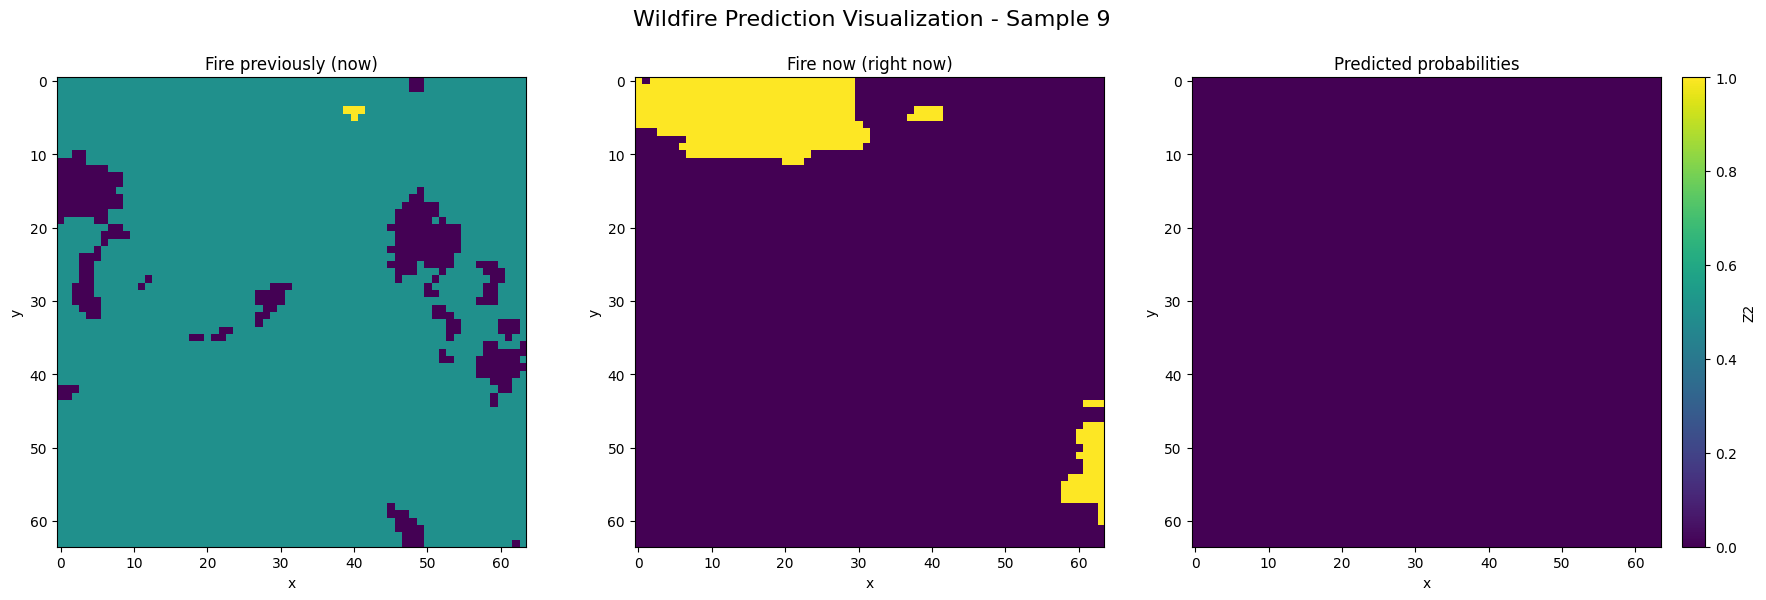

In [5]:
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")
dataset = get_dataset(
            f"../dataset/*{"test"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))


for i in range(10):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # First plot: Previous fire mask
    axs[0].imshow(X[i, :, :, 11], cmap='viridis', interpolation='none')
    axs[0].set_title('Fire previously (now)')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    
    # Second plot: Actual fire mask
    axs[1].imshow(Y[i, :, :, 0], cmap='viridis', interpolation='none')
    axs[1].set_title('Fire now (right now)')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    
    # Third plot: Predicted probabilities
    predictions = model(X[i, :, :, :], training=False)
    im = axs[2].imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none', vmin=0, vmax=1)
    axs[2].set_title('Predicted probabilities')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    cbar = fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
    cbar.set_label('Z2')
    
    fig.suptitle(f'Wildfire Prediction Visualization - Sample {i}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [6]:
from model import STCAR_nn

dataset = get_dataset_from_generator(buffer_size=2)

model = STCAR()
model.distance = 2
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
    )
model.fit(dataset, epochs=1, 
        batch_size=1
          )

43987/43987 ━━━━━━━━━━━━━━━━━━━━ 1701s 39ms/step - loss: 33.0958 - loss_Z1: 31.6841 - loss_Z2: 1.4117


c:\Users\gebruiker\anaconda3\envs\thesis\Lib\site-packages\keras\src\trainers\epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


rho: 0.039710309356451035
r: 0.039718594402074814
kernel: [[ -0.48692775]
 [ -0.32400465]
 [-13.089621  ]
 [ -7.59716   ]
 [ -6.832321  ]
 [-14.748186  ]
 [-62.361683  ]
 [ -8.097949  ]
 [  0.25812635]
 [-39.008343  ]
 [ 20.97204   ]
 [ 96.98541   ]]
bias: [-54.12172]


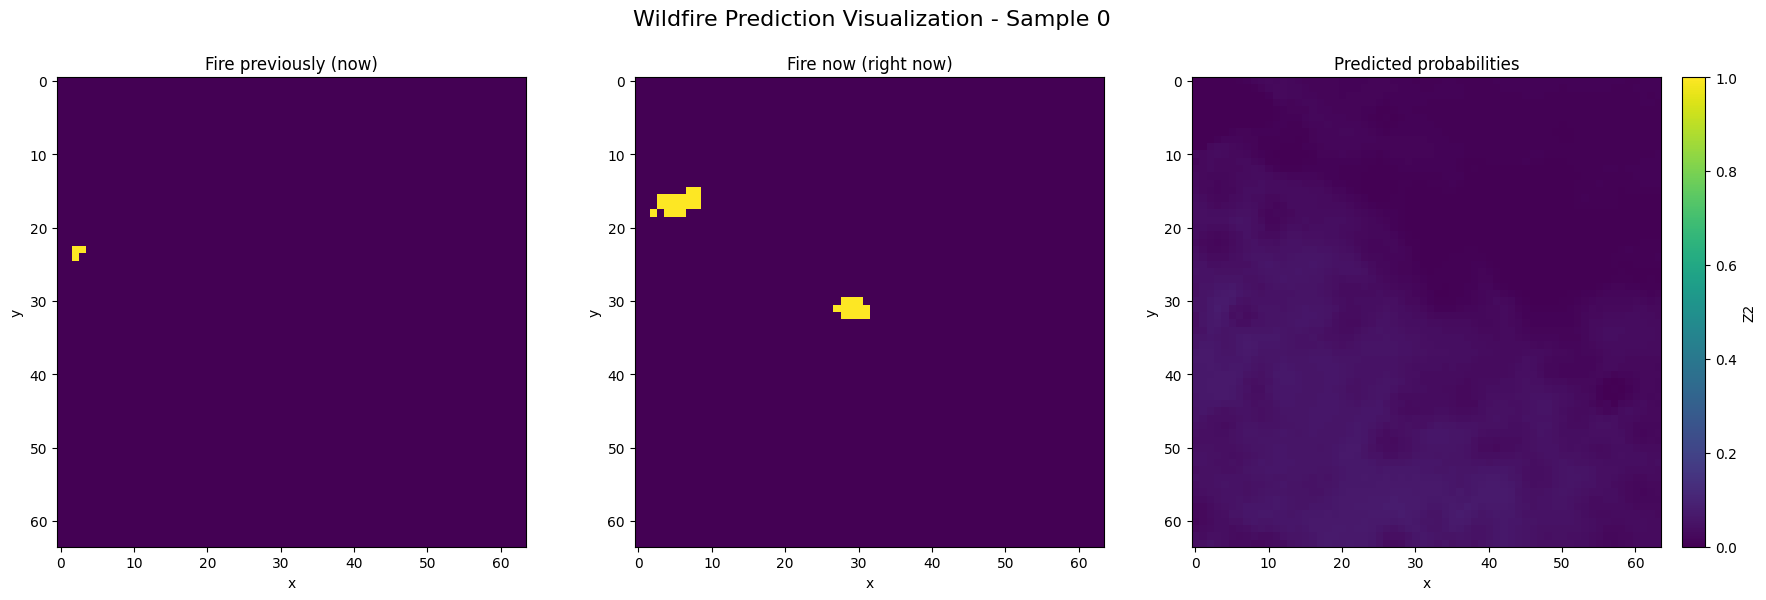

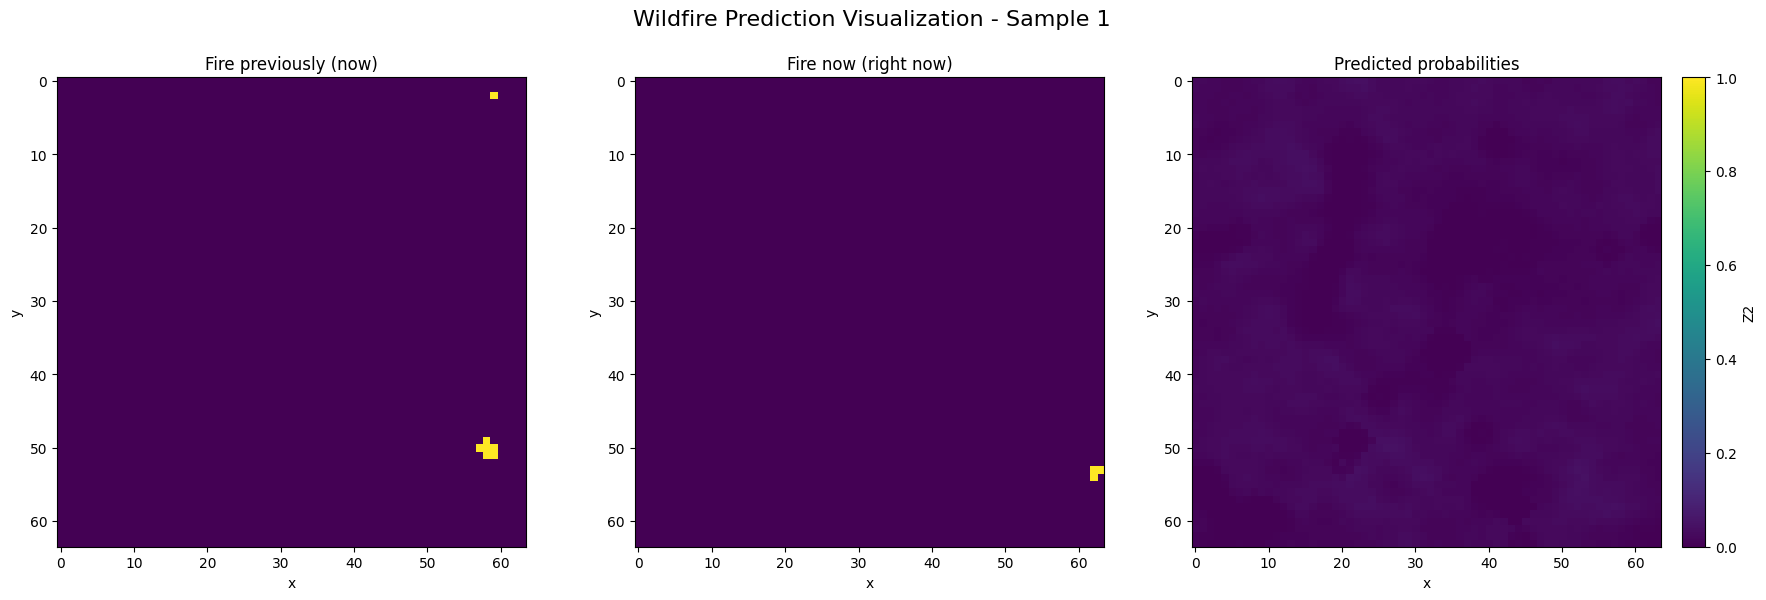

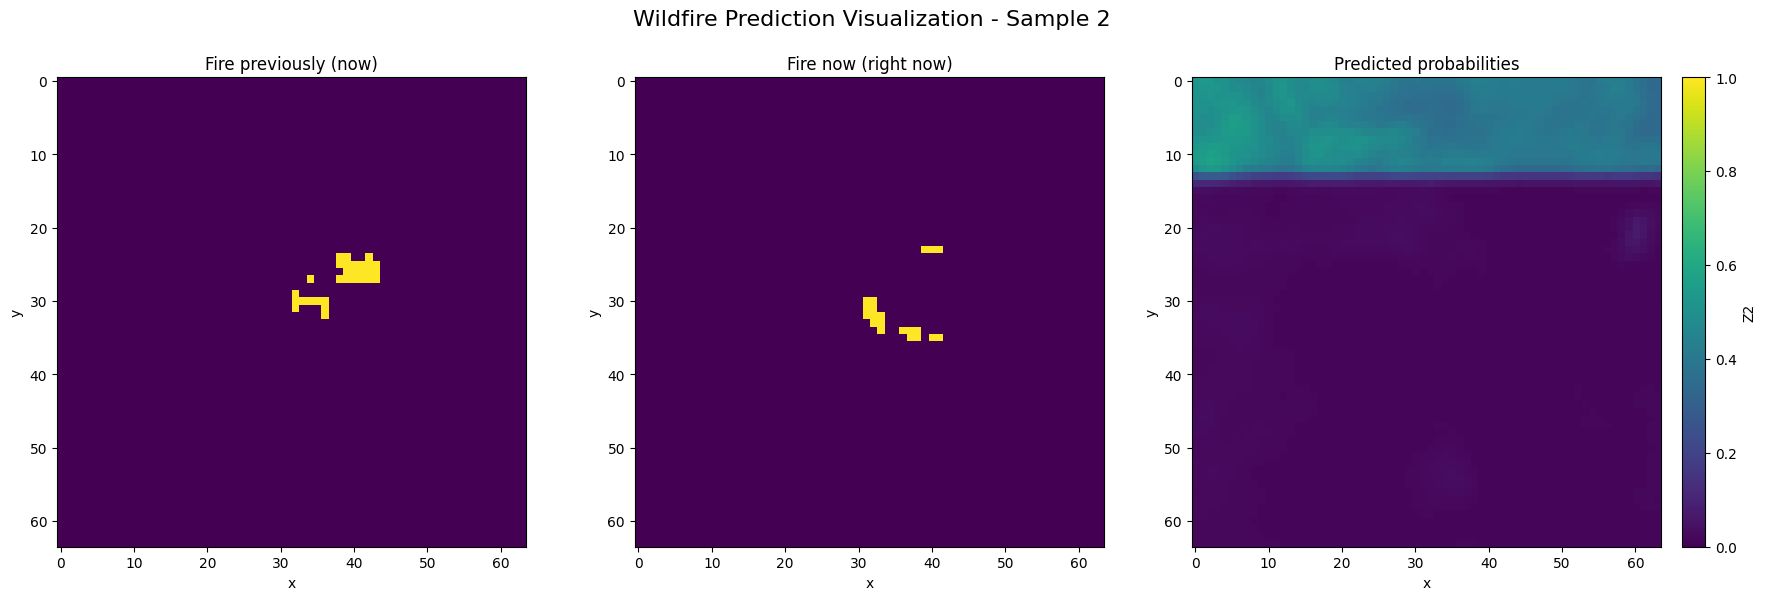

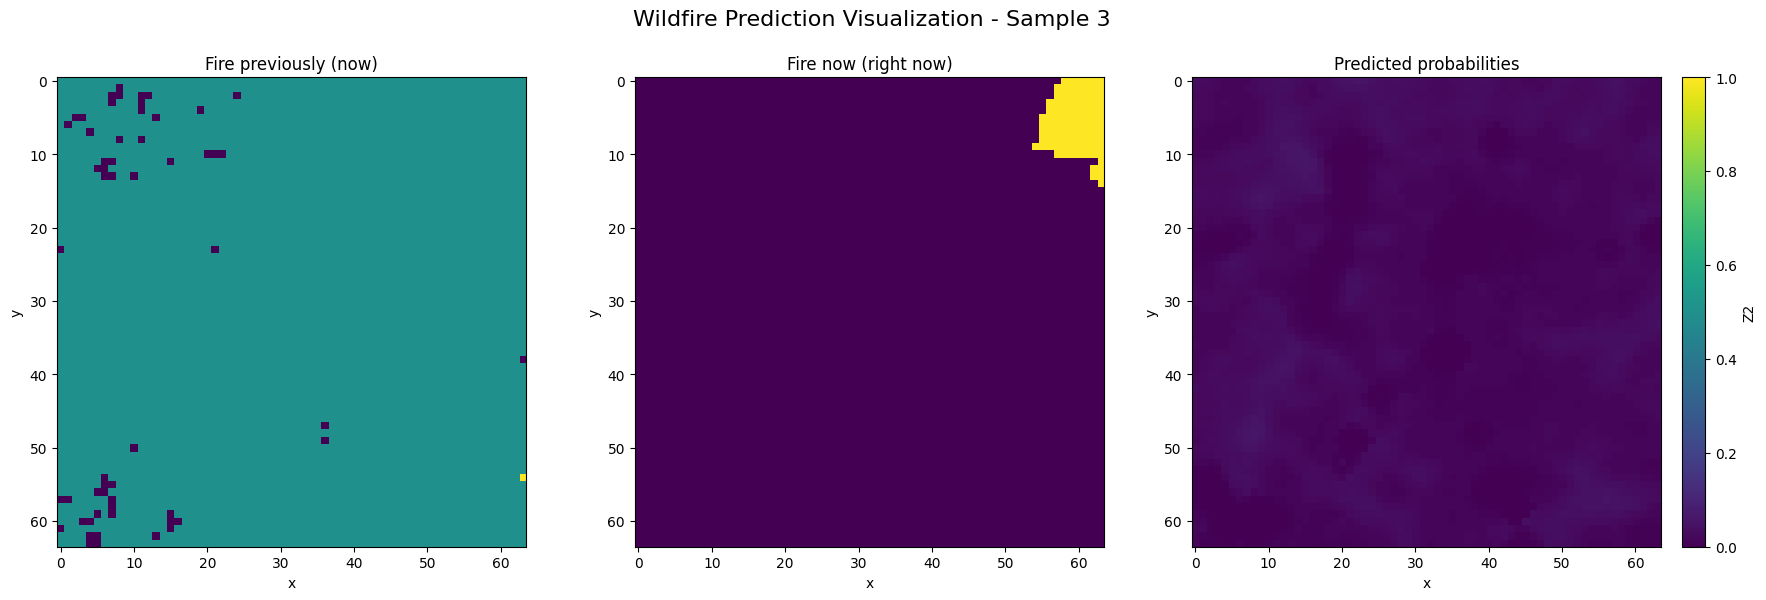

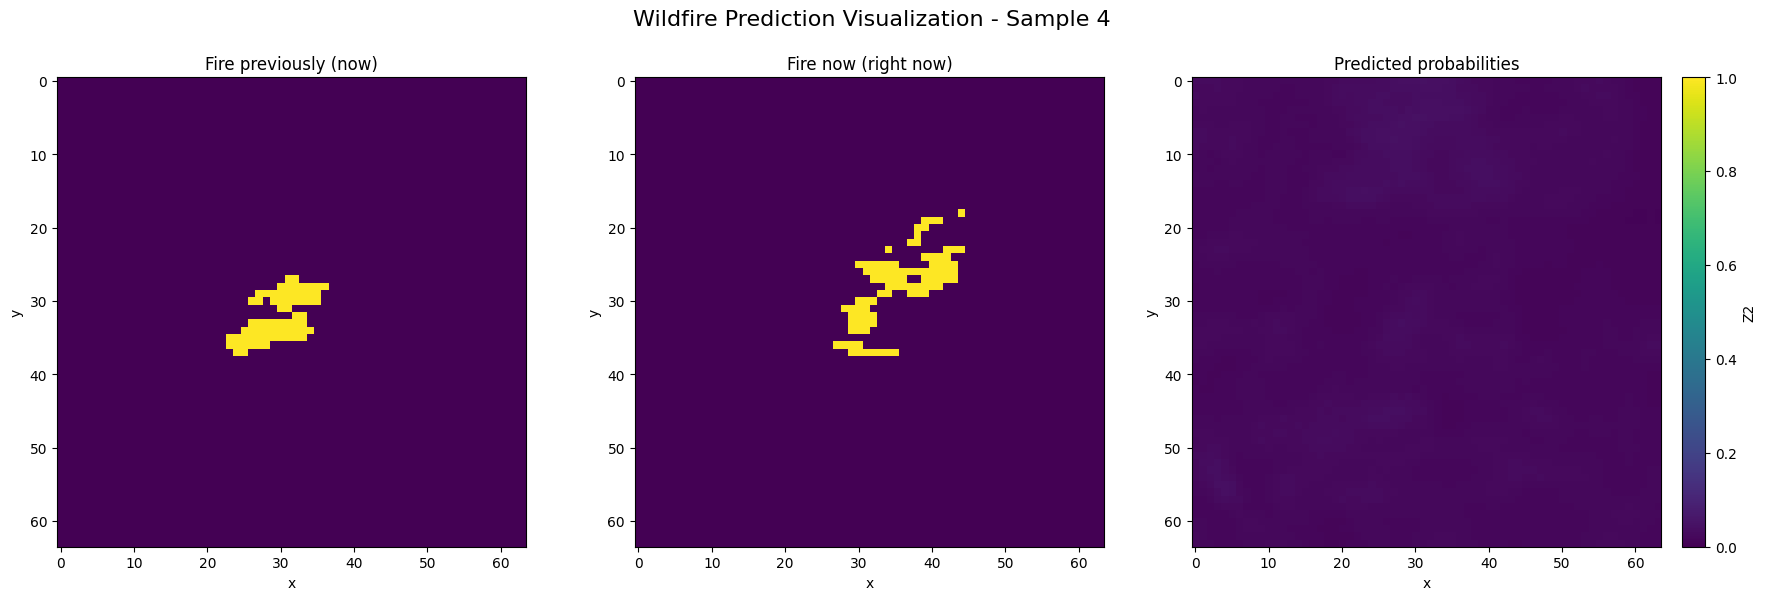

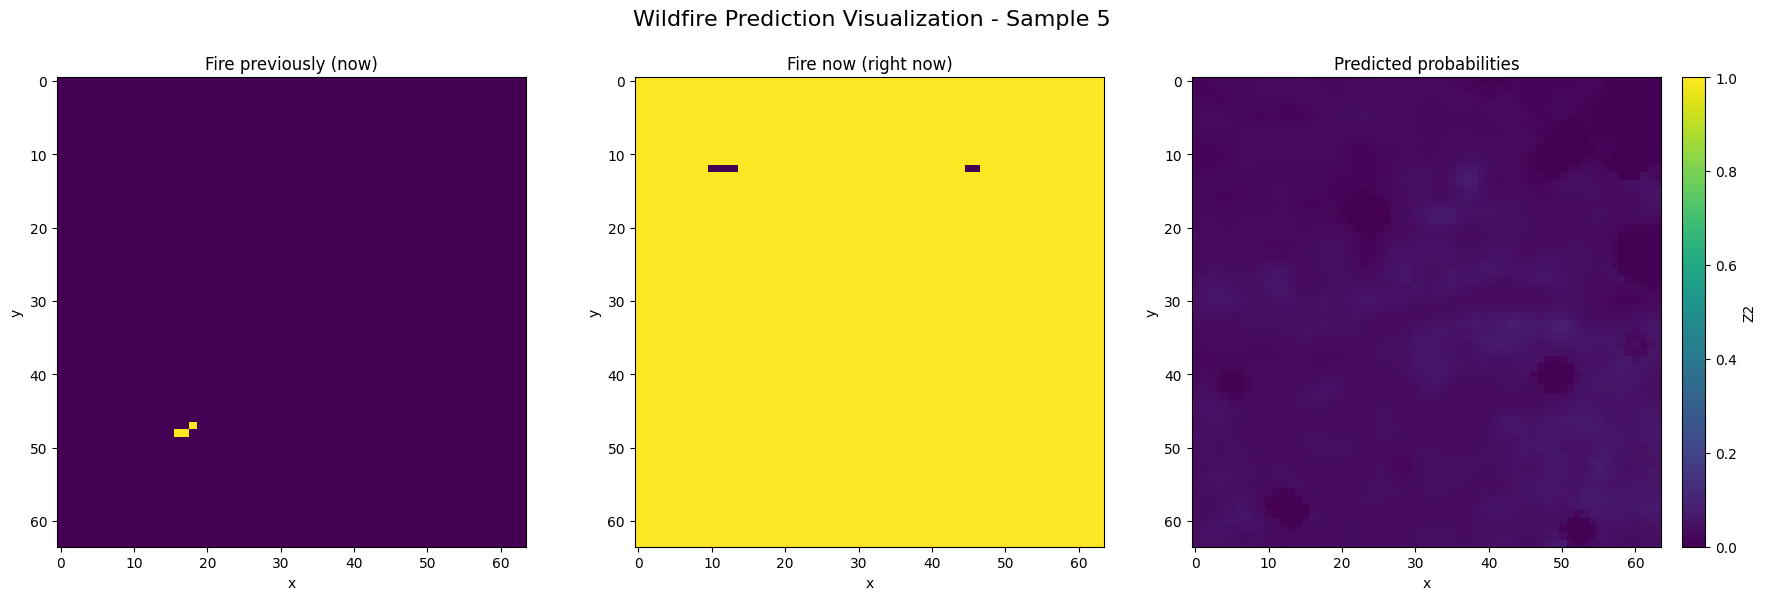

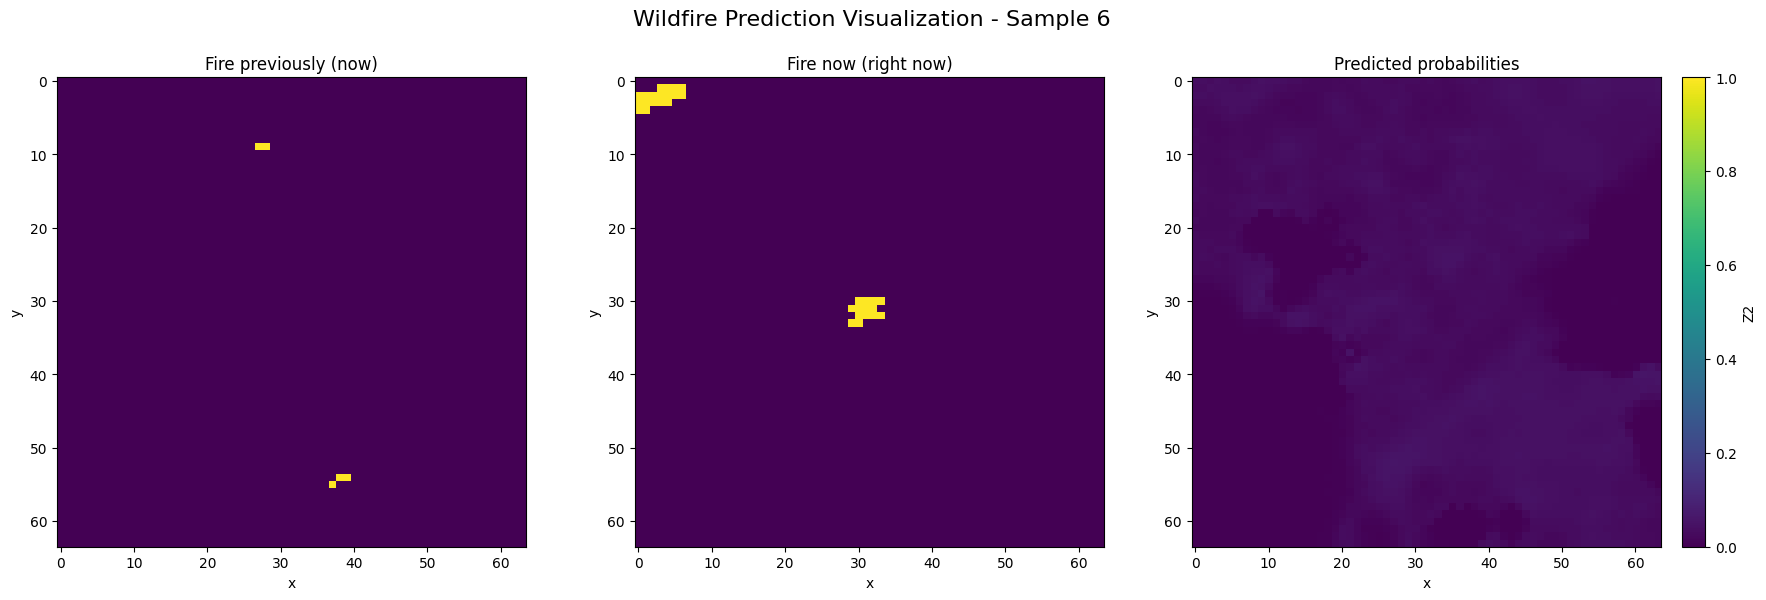

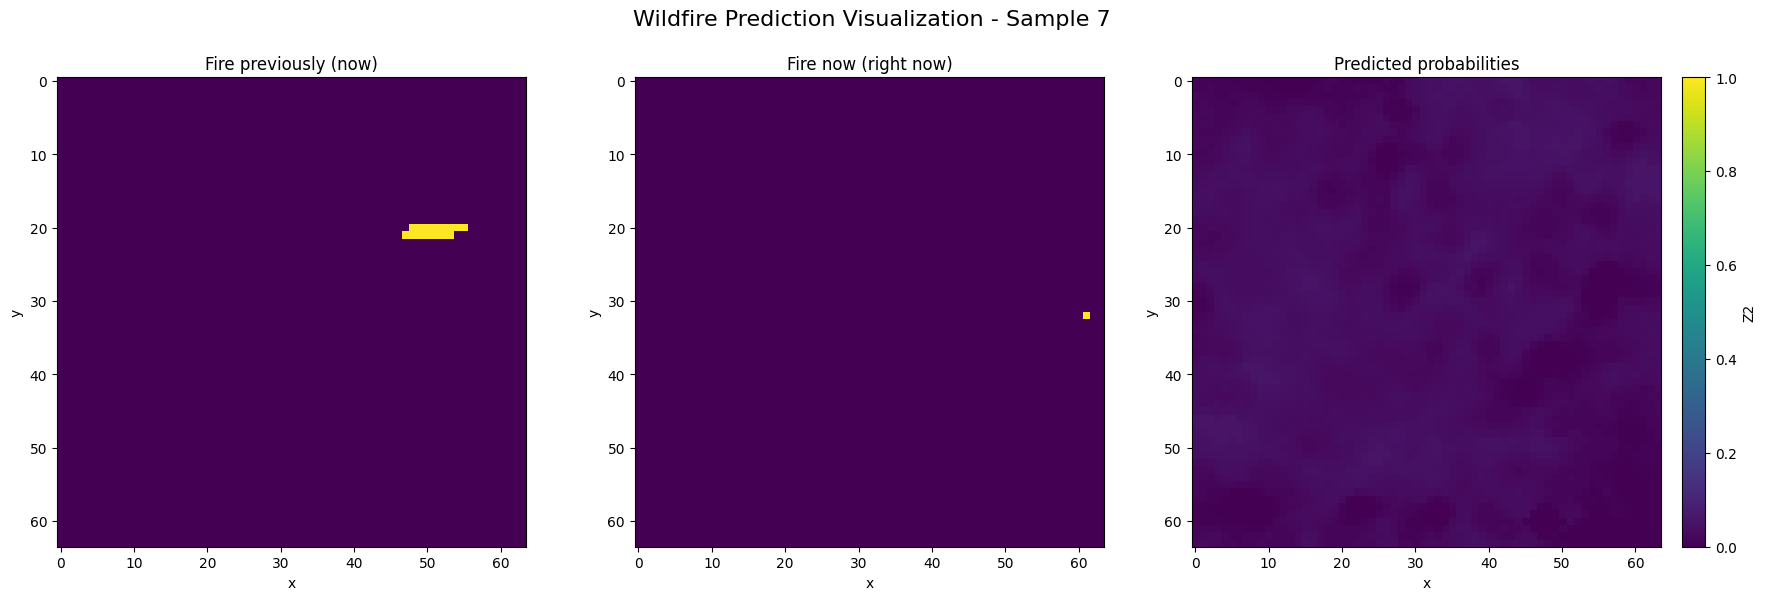

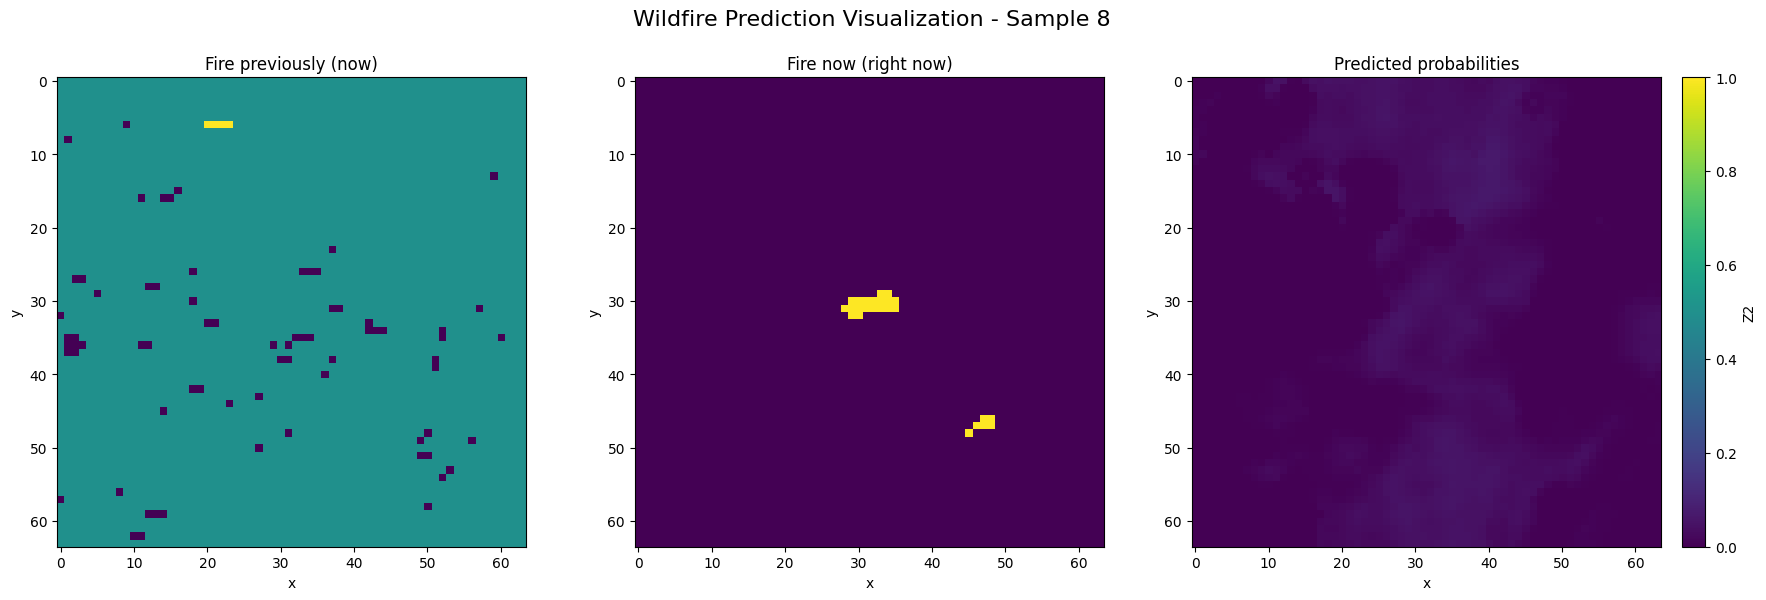

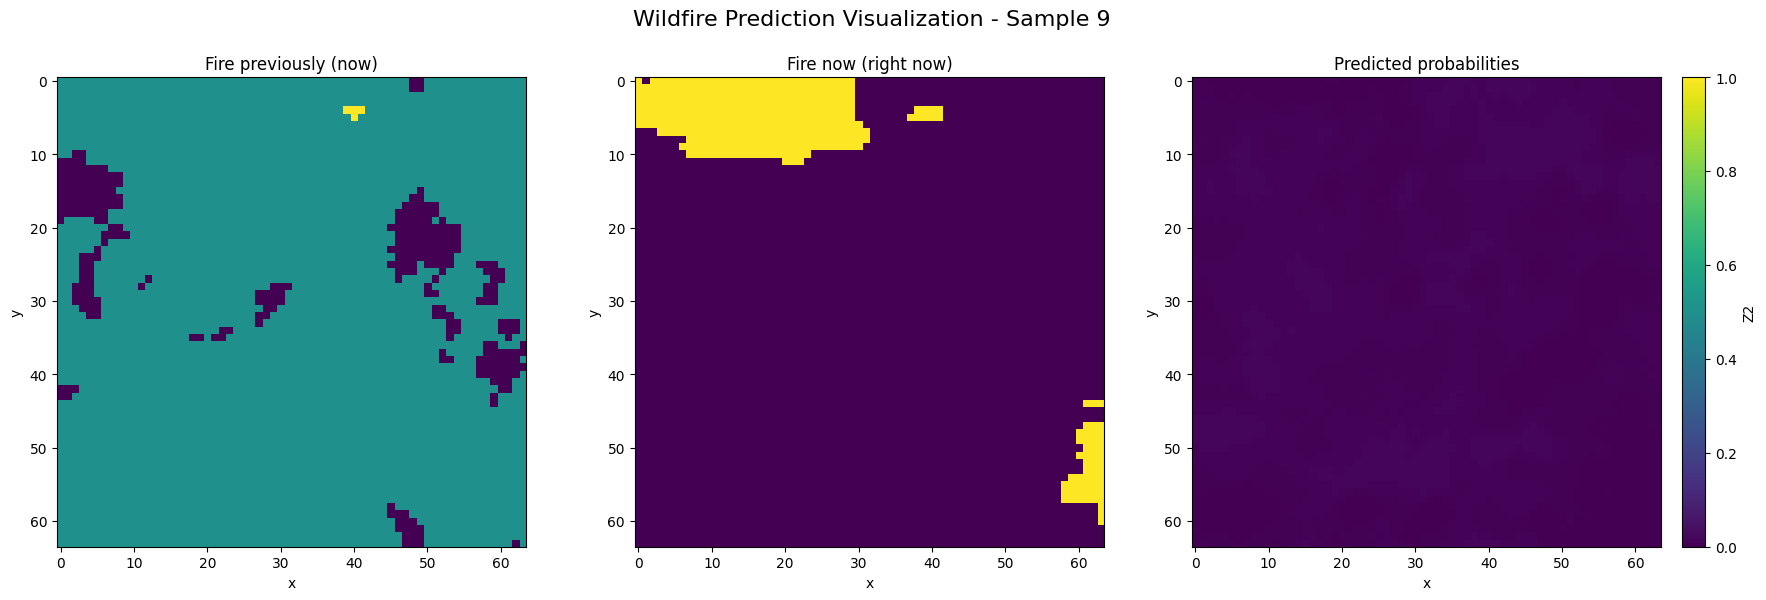

In [7]:
for var in model.trainable_variables:
    print(f"{var.name}: {var.numpy()}")
dataset = get_dataset(
            f"../dataset/*{"test"}*.tfrecord",
            data_size=64,
            sample_size=64,
            batch_size=100,
            num_in_channels=12,
            compression_type=None,
            clip_and_normalize=False,
            clip_and_rescale=False,
            random_crop=False,
            center_crop=False)


X, Y =next(iter(dataset))


for i in range(10):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # First plot: Previous fire mask
    axs[0].imshow(X[i, :, :, 11], cmap='viridis', interpolation='none')
    axs[0].set_title('Fire previously (now)')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    
    # Second plot: Actual fire mask
    axs[1].imshow(Y[i, :, :, 0], cmap='viridis', interpolation='none')
    axs[1].set_title('Fire now (right now)')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    
    # Third plot: Predicted probabilities
    predictions = model(X[i, :, :, :], training=False)
    im = axs[2].imshow(tf.reshape(predictions['Z2'], (64, 64)), cmap='viridis', interpolation='none', vmin=0, vmax=1)
    axs[2].set_title('Predicted probabilities')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')
    cbar = fig.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
    cbar.set_label('Z2')
    
    fig.suptitle(f'Wildfire Prediction Visualization - Sample {i}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()